In [308]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt 
import operator
import math

In [40]:
folder = 'ml-100k/'
m_cols = ['movie_id','movie title','release date','video release date','IMDb URL'
          ,'unknown','Action','Adventure','Animation','Childrens','Comedy',
          'Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
        'Thriller','War','Western']
data= pd.read_csv(folder+'u.item',delimiter='|',names=m_cols,encoding='latin-1')
data.shape
np.random.seed(1002)


In [41]:
data.head()

movie_id        movie title release date  video release date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            IMDb URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Childrens  ...  Fantasy  Film-Noir  Horror  Musical  \
0          0          1          1  ...        0          0       0        0   
1          1          0          0  ...        0          0       0        0   
2          0          0          0  ...        0          0       0        0   
3          0          0          0  ...        0          0       0        0   
4          0          0          0  ...        0          0       0        0   

   Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0       0         0    0        0  
1        0        0       0         1    0        0  
2        0        0       0         1    0        0  
3        0        0       0         0    0        0  
4        0        0       0         1    0        0  

[5 rows x 24 columns]

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie title         1682 non-null   object 
 2   release date        1681 non-null   object 
 3   video release date  0 non-null      float64
 4   IMDb URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Childrens           1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [138]:
#number of unique movies
movies = data['movie_id'].unique().tolist()
num_items = len(movies)
num_items
movies

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [44]:
u_cols = ['user_id','age','gender','occupation','zip_code']
data_u = pd.read_csv(folder+'u.user',delimiter='|',names=u_cols,encoding='latin-1')
data_u.shape

(943, 5)

In [45]:
data_u.head()

user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213

In [46]:
users = data_u['user_id'].unique().tolist()
num_users = len(users)
num_users

943

In [47]:
r_cols = ['user_id','movie_id','rating','timestamp']
data_r = pd.read_csv(folder+'u.data',delimiter='\t',names=r_cols,encoding='latin-1')
data_r.shape

(100000, 4)

In [48]:
data_r.head()

user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596

In [49]:
num_ratings = data_r.shape[0]
num_ratings

100000

In [50]:
rec_matrix_size = num_users * num_items
sparsity = 1 - num_ratings / rec_matrix_size
sparsity

0.9369533063577546

In [51]:
movie_data_ratings_data=data.merge(data_r,on = 'movie_id',how = 'inner')
movie_data_ratings_data.head()
movie_data_ratings_data['user_id'] == None
movie_data_ratings_data[movie_data_ratings_data['movie_id'] == 242]
movie_data_ratings_data.shape

(100000, 27)

In [52]:
#displays high rated movies
high_rated= movie_data_ratings_data['rating']==5.0
movie_data_ratings_data[high_rated].head(10)

movie_id       movie title release date  video release date  \
1          1  Toy Story (1995)  01-Jan-1995                 NaN   
8          1  Toy Story (1995)  01-Jan-1995                 NaN   
10         1  Toy Story (1995)  01-Jan-1995                 NaN   
22         1  Toy Story (1995)  01-Jan-1995                 NaN   
32         1  Toy Story (1995)  01-Jan-1995                 NaN   
37         1  Toy Story (1995)  01-Jan-1995                 NaN   
39         1  Toy Story (1995)  01-Jan-1995                 NaN   
41         1  Toy Story (1995)  01-Jan-1995                 NaN   
48         1  Toy Story (1995)  01-Jan-1995                 NaN   
51         1  Toy Story (1995)  01-Jan-1995                 NaN   

                                             IMDb URL  unknown  Action  \
1   http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
8   http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
10  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
22  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
32  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
37  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
39  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
41  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
48  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
51  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   

    Adventure  Animation  Childrens  ...  Musical  Mystery  Romance  Sci-Fi  \
1           0          1          1  ...        0        0        0       0   
8           0          1          1  ...        0        0        0       0   
10          0          1          1  ...        0        0        0       0   
22          0          1          1  ...        0        0        0       0   
32          0          1          1  ...        0        0        0       0   
37          0          1          1  ...        0        0        0       0   
39          0          1          1  ...        0        0        0       0   
41          0          1          1  ...        0        0        0       0   
48          0          1          1  ...        0        0        0       0   
51          0          1          1  ...        0        0        0       0   

    Thriller  War  Western  user_id  rating  timestamp  
1          0    0        0      287       5  875334088  
8          0    0        0       95       5  879197329  
10         0    0        0      189       5  893264174  
22         0    0        0      340       5  884990988  
32         0    0        0       43       5  875975579  
37         0    0        0       38       5  892430636  
39         0    0        0       96       5  884403574  
41         0    0        0      157       5  874813703  
48         0    0        0       18       5  880130802  
51         0    0        0       45       5  881013176  

[10 rows x 27 columns]

In [53]:
genres = ['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror',
'Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
genres_count = {}
for genre in genres:
    count = 0
    genre_movies = movie_data_ratings_data[genre] == 1
    genres_count[genre] = movie_data_ratings_data[genre_movies].shape[0]

print(genres_count)
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)
print(genres_count_list)

{'unknown': 10, 'Action': 25589, 'Adventure': 13753, 'Animation': 3605, 'Childrens': 7182, 'Comedy': 29832, 'Crime': 8055, 'Documentary': 758, 'Drama': 39895, 'Fantasy': 1352, 'Film-Noir': 1733, 'Horror': 5317, 'Musical': 4954, 'Mystery': 5245, 'Romance': 19461, 'Sci-Fi': 12730, 'Thriller': 21872, 'War': 9398, 'Western': 1854}
[('Drama', 39895), ('Comedy', 29832), ('Action', 25589), ('Thriller', 21872), ('Romance', 19461), ('Adventure', 13753), ('Sci-Fi', 12730), ('War', 9398), ('Crime', 8055), ('Childrens', 7182), ('Horror', 5317), ('Mystery', 5245), ('Musical', 4954), ('Animation', 3605), ('Western', 1854), ('Film-Noir', 1733), ('Fantasy', 1352), ('Documentary', 758), ('unknown', 10)]


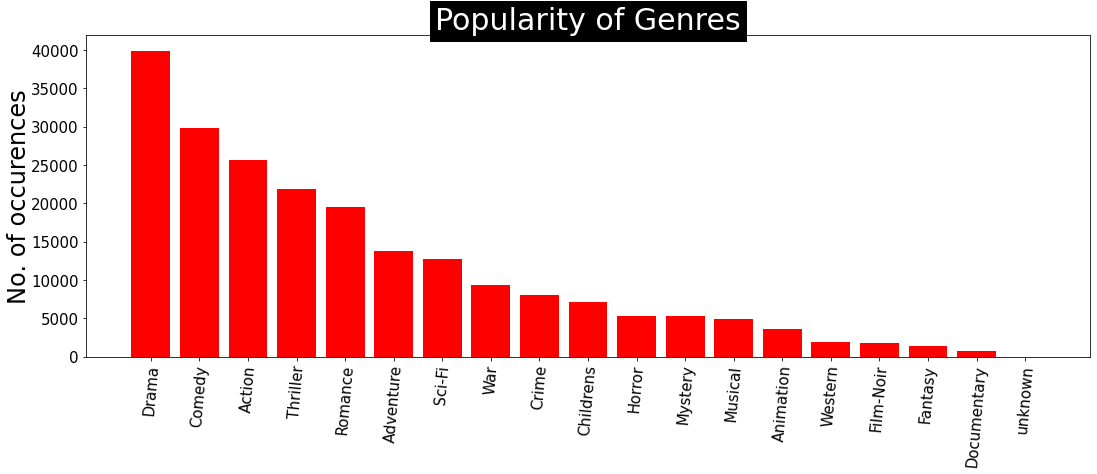

In [54]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

##### So far I used Dr. Asnat Messica  to to show ditribution of high ratings per genre, and to generae the merged DF of movies + ratings

so to be specific


# QUESTION 1

### Sparsity distribution of number of ratings 

In [55]:
sparsity = 1 - num_ratings / rec_matrix_size
sparsity

0.9369533063577546

In [56]:
ratings = range(1,6)
ratings_count = {}
for r in ratings:
    count = 0
    current_rating = movie_data_ratings_data['rating'] == r
    ratings_count[r] = movie_data_ratings_data[current_rating].shape[0]

print(ratings_count)
# genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)
# print(genres_count_list)
ratings_count_list = sorted(ratings_count.items(), key=operator.itemgetter(1),reverse=True)
print(ratings_count_list)

{1: 6110, 2: 11370, 3: 27145, 4: 34174, 5: 21201}
[(4, 34174), (3, 27145), (5, 21201), (2, 11370), (1, 6110)]


### distribution of ratings

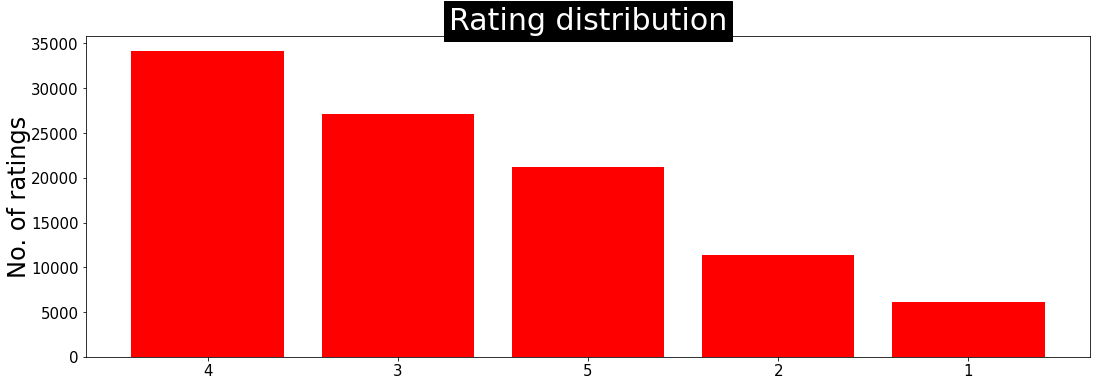

In [57]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genre[1] for genre in ratings_count_list]
x_axis = [i for i in range(len(ratings_count_list))]
x_label = [r[0] for r in ratings_count_list]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of ratings", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Rating distribution",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

### Average rating per user

In [58]:
users_avg_ratings =  movie_data_ratings_data.groupby('user_id')['rating'].mean().reset_index()
users_avg_ratings.sort_values(by=['rating'], ascending=False).head()

user_id    rating
848      849  4.869565
687      688  4.833333
506      507  4.724138
627      628  4.703704
927      928  4.687500

### Average rating per movie

In [59]:
users_avg_ratings =  movie_data_ratings_data.groupby('movie title')['rating'].mean().reset_index()
users_avg_ratings.head()
users_avg_ratings.sort_values(by=['rating'], ascending=False).head()

movie title  rating
1472              They Made Me a Criminal (1939)     5.0
944   Marlene Dietrich: Shadow and Light (1996)      5.0
1273        Saint of Fort Washington, The (1993)     5.0
1359               Someone Else's America (1995)     5.0
1387                             Star Kid (1997)     5.0

# QUESTION 2

In [176]:
users_ratings = {}
user_movie_rating = {}
for u in range(1,num_users):
    current_rating = movie_data_ratings_data['user_id'] == u
    users_ratings[u] = dict(zip(movie_data_ratings_data[current_rating].movie_id,movie_data_ratings_data[current_rating].rating))
    for [movie_id, rating] in users_ratings[u].items():
        user_movie_rating[(u, movie_id)] = rating



{(1, 1): 5,
 (1, 2): 3,
 (1, 3): 4,
 (1, 4): 3,
 (1, 5): 3,
 (1, 6): 5,
 (1, 7): 4,
 (1, 8): 1,
 (1, 9): 5,
 (1, 10): 3,
 (1, 11): 2,
 (1, 12): 5,
 (1, 13): 5,
 (1, 14): 5,
 (1, 15): 5,
 (1, 16): 5,
 (1, 17): 3,
 (1, 18): 4,
 (1, 19): 5,
 (1, 20): 4,
 (1, 21): 1,
 (1, 22): 4,
 (1, 23): 4,
 (1, 24): 3,
 (1, 25): 4,
 (1, 26): 3,
 (1, 27): 2,
 (1, 28): 4,
 (1, 29): 1,
 (1, 30): 3,
 (1, 31): 3,
 (1, 32): 5,
 (1, 33): 4,
 (1, 34): 2,
 (1, 35): 1,
 (1, 36): 2,
 (1, 37): 2,
 (1, 38): 3,
 (1, 39): 4,
 (1, 40): 3,
 (1, 41): 2,
 (1, 42): 5,
 (1, 43): 4,
 (1, 44): 5,
 (1, 45): 5,
 (1, 46): 4,
 (1, 47): 4,
 (1, 48): 5,
 (1, 49): 3,
 (1, 50): 5,
 (1, 51): 4,
 (1, 52): 4,
 (1, 53): 3,
 (1, 54): 3,
 (1, 55): 5,
 (1, 56): 4,
 (1, 57): 5,
 (1, 58): 4,
 (1, 59): 5,
 (1, 60): 5,
 (1, 61): 4,
 (1, 62): 3,
 (1, 63): 2,
 (1, 64): 5,
 (1, 65): 4,
 (1, 66): 4,
 (1, 67): 3,
 (1, 68): 4,
 (1, 69): 3,
 (1, 70): 3,
 (1, 71): 3,
 (1, 72): 4,
 (1, 73): 3,
 (1, 74): 1,
 (1, 75): 4,
 (1, 76): 4,
 (1, 77): 4,
 (1, 78)

In [142]:
movies_rating = {}
for m in range(1, num_items):
    current_rating = movie_data_ratings_data['movie_id'] == m
    movies_rating[m] = dict(zip(movie_data_ratings_data[current_rating].user_id,movie_data_ratings_data[current_rating].rating))
movies_rating

{1: {308: 4,
  287: 5,
  148: 4,
  280: 4,
  66: 3,
  5: 4,
  109: 4,
  181: 3,
  95: 5,
  268: 3,
  189: 5,
  145: 3,
  158: 4,
  67: 3,
  232: 4,
  150: 4,
  289: 3,
  117: 4,
  49: 2,
  223: 4,
  56: 4,
  17: 4,
  340: 5,
  177: 3,
  194: 4,
  250: 4,
  213: 2,
  350: 4,
  348: 4,
  131: 4,
  106: 4,
  234: 3,
  43: 5,
  20: 3,
  246: 4,
  94: 4,
  279: 3,
  38: 5,
  128: 4,
  96: 5,
  203: 3,
  157: 5,
  311: 4,
  125: 4,
  286: 4,
  83: 4,
  301: 4,
  345: 3,
  18: 5,
  322: 2,
  64: 4,
  45: 5,
  247: 4,
  204: 2,
  271: 3,
  41: 4,
  274: 4,
  222: 4,
  15: 1,
  23: 5,
  141: 3,
  359: 4,
  374: 4,
  380: 4,
  10: 4,
  320: 3,
  160: 4,
  396: 4,
  339: 5,
  199: 1,
  422: 3,
  81: 4,
  42: 5,
  357: 5,
  26: 3,
  327: 4,
  200: 5,
  44: 4,
  256: 5,
  174: 3,
  97: 4,
  243: 4,
  101: 3,
  490: 3,
  242: 4,
  312: 5,
  325: 2,
  456: 2,
  347: 4,
  360: 3,
  450: 4,
  84: 2,
  198: 4,
  494: 3,
  525: 4,
  2: 4,
  62: 2,
  343: 5,
  298: 5,
  459: 4,
  407: 4,
  471: 4,
  535: 

In [137]:
movies_rating

{942: {896: 3}}

In [148]:
a= movie_data_ratings_data[(movie_data_ratings_data.movie_id == 1) & (movie_data_ratings_data.user_id == 5)]
a.rating

5    4
Name: rating, dtype: int64

### QUESTION 2 - GD impl

In [327]:
num_users = len(users)
num_movies = len(movies)
K = 10

In [314]:
def calculate_rmse(U,V): 
    UV_T = U.dot(V.T)
    total = 0
    err = 0
    for i in range(num_users):
        for j in range(num_movies):
            t = (i, j)
            if t in user_movie_rating:
                total+=1
                err += (user_movie_rating[t] - UV_T.loc[i,j]) ** 2
    return math.sqrt(err / total)

In [324]:
U = pd.DataFrame(np.random.rand(num_users,K))
V = pd.DataFrame(np.random.rand(num_movies,K))
alpha = 0.0003
rounds = 0
lamnda_regularization = 0.02
while rounds < 20:
    rounds+=1
    UV_T = U.dot(V.T)
    print('round: %d RMSE %f'% (rounds ,calculate_rmse(U,V)))
    for i in range(1, num_users):
        for q in range(K):
            err_user_component = 0
            for j in range(1, num_movies):
                if (i,j) in user_movie_rating:
                    e_ij = user_movie_rating[(i,j)] - UV_T.loc[i, j]
                    err_user_component += V.loc[j,q] * e_ij
            U.loc[i,q] += alpha * (err_user_component - lamnda_regularization * U.loc[i,q])
    UV_T = U.dot(V.T)
    for movie_id in range(1, num_movies):
        for q in range(K): 
            err_movie_component = 0
            for user_id in range(1, num_users):
                if (user_id,movie_id) in user_movie_rating:
                    e_ij = user_movie_rating[(user_id,movie_id)] - UV_T.loc[user_id, movie_id]
                    err_movie_component += U.loc[user_id,q] * e_ij
            V.loc[movie_id, q] +=  alpha * (err_movie_component - lamnda_regularization * V.loc[movie_id, q])
                    
            
    


round: 1 RMSE 2.089950
round: 2 RMSE 1.539099
round: 3 RMSE 1.357164
round: 4 RMSE 1.268331
round: 5 RMSE 1.214944
round: 6 RMSE 1.178439
round: 7 RMSE 1.151323
round: 8 RMSE 1.130036
round: 9 RMSE 1.112665
round: 10 RMSE 1.098082
round: 11 RMSE 1.085571
round: 12 RMSE 1.074656
round: 13 RMSE 1.065003
round: 14 RMSE 1.056372
round: 15 RMSE 1.048584
round: 16 RMSE 1.041505
round: 17 RMSE 1.035026
round: 18 RMSE 1.029065
round: 19 RMSE 1.023554
round: 20 RMSE 1.018438


In [ ]:
U = pd.DataFrame(np.random.rand(num_users,K))
V = pd.DataFrame(np.random.rand(num_movies,K))
alpha = 0.0003
rounds = 0
lamnda_regularization = 0.002
while rounds < 20:
    rounds+=1
    UV_T = U.dot(V.T)
    print('round: %d RMSE %f'% (rounds ,calculate_rmse(U,V)))
    for i in range(1, num_users):
        for q in range(K):
            err_user_component = 0
            for j in range(1, num_movies):
                if (i,j) in user_movie_rating:
                    e_ij = user_movie_rating[(i,j)] - UV_T.loc[i, j]
                    err_user_component += V.loc[j,q] * e_ij
            U.loc[i,q] += alpha * (err_user_component - lamnda_regularization * U.loc[i,q])
    UV_T = U.dot(V.T)
    for movie_id in range(1, num_movies):
        for q in range(K): 
            err_movie_component = 0
            for user_id in range(1, num_users):
                if (user_id,movie_id) in user_movie_rating:
                    e_ij = user_movie_rating[(user_id,movie_id)] - UV_T.loc[user_id, movie_id]
                    err_movie_component += U.loc[user_id,q] * e_ij
            V.loc[movie_id, q] +=  alpha * (err_movie_component - lamnda_regularization * V.loc[movie_id, q])
                    
            
    


round: 1 RMSE 1.652352
round: 2 RMSE 1.444232
round: 3 RMSE 1.305988
round: 4 RMSE 1.216740
round: 5 RMSE 1.158254
round: 6 RMSE 1.118303
round: 7 RMSE 1.089634


In [326]:
UV_T = U.dot(V.T)
for i in range(num_users):
    for j in range(num_movies):
        t = (i, j)
        if t in user_movie_rating:
            print('rael value: %d'% user_movie_rating[t])
            print('prediction: %f'% UV_T.loc[t[0], t[1]])        

UV_T.shape

rael value: 5
prediction: 3.805271
rael value: 3
prediction: 3.312481
rael value: 4
prediction: 3.003558
rael value: 3
prediction: 3.606487
rael value: 3
prediction: 2.723694
rael value: 5
prediction: 3.725793
rael value: 4
prediction: 3.636606
rael value: 1
prediction: 3.797560
rael value: 5
prediction: 3.385858
rael value: 3
prediction: 3.912356
rael value: 2
prediction: 3.737113
rael value: 5
prediction: 4.042714
rael value: 5
prediction: 3.446424
rael value: 5
prediction: 3.399600
rael value: 5
prediction: 3.595338
rael value: 5
prediction: 3.657861
rael value: 3
prediction: 3.099820
rael value: 4
prediction: 3.778166
rael value: 5
prediction: 3.608762
rael value: 4
prediction: 3.440738
rael value: 1
prediction: 2.988894
rael value: 4
prediction: 4.091937
rael value: 4
prediction: 3.733455
rael value: 3
prediction: 3.233705
rael value: 4
prediction: 3.300847
rael value: 3
prediction: 3.560547
rael value: 2
prediction: 3.325967
rael value: 4
prediction: 3.727280
rael value: 1
predic

rael value: 4
prediction: 4.342305
rael value: 4
prediction: 3.889467
rael value: 4
prediction: 4.289245
rael value: 5
prediction: 4.116958
rael value: 3
prediction: 3.182668
rael value: 5
prediction: 4.133065
rael value: 3
prediction: 4.430397
rael value: 4
prediction: 3.654919
rael value: 5
prediction: 3.638003
rael value: 4
prediction: 4.519890
rael value: 5
prediction: 4.639026
rael value: 5
prediction: 4.304261
rael value: 5
prediction: 5.011520
rael value: 5
prediction: 3.555176
rael value: 3
prediction: 4.068438
rael value: 5
prediction: 4.550652
rael value: 3
prediction: 4.201328
rael value: 4
prediction: 3.728064
rael value: 5
prediction: 4.738060
rael value: 5
prediction: 3.872967
rael value: 3
prediction: 4.531527
rael value: 4
prediction: 4.664242
rael value: 3
prediction: 4.217408
rael value: 5
prediction: 4.284271
rael value: 5
prediction: 3.903195
rael value: 5
prediction: 4.319868
rael value: 3
prediction: 4.001304
rael value: 5
prediction: 3.981675
rael value: 3
predic

rael value: 4
prediction: 3.770432
rael value: 4
prediction: 4.477728
rael value: 5
prediction: 4.649125
rael value: 4
prediction: 4.571151
rael value: 5
prediction: 4.192669
rael value: 5
prediction: 3.522981
rael value: 5
prediction: 4.193816
rael value: 4
prediction: 3.526892
rael value: 3
prediction: 4.468950
rael value: 4
prediction: 4.386011
rael value: 5
prediction: 4.042943
rael value: 4
prediction: 4.241365
rael value: 5
prediction: 4.164895
rael value: 5
prediction: 4.286263
rael value: 5
prediction: 4.903262
rael value: 5
prediction: 4.139389
rael value: 3
prediction: 3.744452
rael value: 3
prediction: 3.735852
rael value: 5
prediction: 4.194960
rael value: 2
prediction: 4.113601
rael value: 3
prediction: 3.722355
rael value: 3
prediction: 3.521155
rael value: 4
prediction: 4.139790
rael value: 4
prediction: 4.603449
rael value: 5
prediction: 4.575700
rael value: 4
prediction: 4.611247
rael value: 5
prediction: 4.842609
rael value: 1
prediction: 3.126119
rael value: 1
predic

rael value: 4
prediction: 3.878660
rael value: 2
prediction: 4.201548
rael value: 3
prediction: 2.986546
rael value: 4
prediction: 3.538965
rael value: 3
prediction: 3.808830
rael value: 5
prediction: 4.060362
rael value: 4
prediction: 3.943849
rael value: 3
prediction: 3.662713
rael value: 3
prediction: 3.362941
rael value: 2
prediction: 2.731555
rael value: 4
prediction: 4.006813
rael value: 2
prediction: 2.916420
rael value: 1
prediction: 3.264158
rael value: 4
prediction: 3.855230
rael value: 5
prediction: 4.124565
rael value: 3
prediction: 2.739861
rael value: 4
prediction: 4.082405
rael value: 3
prediction: 3.312127
rael value: 4
prediction: 3.249753
rael value: 2
prediction: 3.522325
rael value: 1
prediction: 2.825963
rael value: 5
prediction: 3.473833
rael value: 4
prediction: 2.762560
rael value: 3
prediction: 3.884420
rael value: 5
prediction: 3.510370
rael value: 5
prediction: 3.312015
rael value: 5
prediction: 4.067408
rael value: 4
prediction: 3.996625
rael value: 1
predic

rael value: 4
prediction: 3.805173
rael value: 2
prediction: 3.595858
rael value: 4
prediction: 2.580871
rael value: 3
prediction: 3.240787
rael value: 4
prediction: 3.889579
rael value: 5
prediction: 3.917141
rael value: 5
prediction: 3.877281
rael value: 3
prediction: 2.999927
rael value: 5
prediction: 3.899807
rael value: 5
prediction: 3.502115
rael value: 4
prediction: 3.505217
rael value: 4
prediction: 3.688004
rael value: 1
prediction: 2.738818
rael value: 3
prediction: 3.986019
rael value: 3
prediction: 3.371867
rael value: 2
prediction: 3.023673
rael value: 5
prediction: 3.446464
rael value: 4
prediction: 4.082475
rael value: 4
prediction: 3.979109
rael value: 4
prediction: 2.847611
rael value: 4
prediction: 3.616630
rael value: 3
prediction: 4.103315
rael value: 5
prediction: 3.200473
rael value: 4
prediction: 3.954143
rael value: 5
prediction: 3.794727
rael value: 5
prediction: 3.445123
rael value: 4
prediction: 4.336969
rael value: 4
prediction: 3.502553
rael value: 5
predic

prediction: 4.445427
rael value: 5
prediction: 4.283672
rael value: 1
prediction: 3.225956
rael value: 4
prediction: 3.093193
rael value: 4
prediction: 3.006672
rael value: 4
prediction: 3.253974
rael value: 4
prediction: 3.656999
rael value: 5
prediction: 4.097158
rael value: 3
prediction: 4.096341
rael value: 4
prediction: 3.650285
rael value: 3
prediction: 3.942592
rael value: 3
prediction: 3.332359
rael value: 5
prediction: 3.973554
rael value: 4
prediction: 3.551167
rael value: 2
prediction: 3.042748
rael value: 5
prediction: 4.706975
rael value: 5
prediction: 4.464445
rael value: 5
prediction: 4.033546
rael value: 4
prediction: 3.357912
rael value: 3
prediction: 3.938776
rael value: 4
prediction: 4.509319
rael value: 5
prediction: 4.241974
rael value: 3
prediction: 3.701457
rael value: 5
prediction: 4.426147
rael value: 4
prediction: 3.975286
rael value: 4
prediction: 3.950657
rael value: 2
prediction: 4.631384
rael value: 2
prediction: 3.649769
rael value: 2
prediction: 3.494260

prediction: 4.126267
rael value: 4
prediction: 4.398762
rael value: 4
prediction: 3.918498
rael value: 5
prediction: 3.685163
rael value: 4
prediction: 4.182727
rael value: 4
prediction: 3.695606
rael value: 3
prediction: 4.415124
rael value: 5
prediction: 3.342496
rael value: 3
prediction: 3.733630
rael value: 3
prediction: 3.668040
rael value: 4
prediction: 3.607553
rael value: 5
prediction: 5.111020
rael value: 4
prediction: 3.041571
rael value: 5
prediction: 4.102544
rael value: 3
prediction: 3.217328
rael value: 5
prediction: 4.515182
rael value: 5
prediction: 3.806468
rael value: 4
prediction: 3.364306
rael value: 4
prediction: 3.368833
rael value: 5
prediction: 4.187576
rael value: 5
prediction: 4.658613
rael value: 4
prediction: 4.529602
rael value: 4
prediction: 4.236833
rael value: 4
prediction: 4.005355
rael value: 3
prediction: 3.311185
rael value: 4
prediction: 4.106451
rael value: 4
prediction: 3.892992
rael value: 4
prediction: 3.972111
rael value: 4
prediction: 4.372217

rael value: 5
prediction: 2.913137
rael value: 3
prediction: 3.101662
rael value: 4
prediction: 3.817411
rael value: 3
prediction: 3.211717
rael value: 2
prediction: 3.274291
rael value: 1
prediction: 3.467307
rael value: 3
prediction: 3.240000
rael value: 4
prediction: 2.560175
rael value: 4
prediction: 3.114320
rael value: 4
prediction: 4.086640
rael value: 1
prediction: 3.632711
rael value: 3
prediction: 3.247243
rael value: 4
prediction: 3.441786
rael value: 2
prediction: 3.937930
rael value: 5
prediction: 3.221779
rael value: 5
prediction: 3.097358
rael value: 2
prediction: 2.986685
rael value: 1
prediction: 3.368835
rael value: 4
prediction: 3.274376
rael value: 2
prediction: 2.696678
rael value: 1
prediction: 3.219902
rael value: 1
prediction: 2.989042
rael value: 4
prediction: 3.215116
rael value: 3
prediction: 2.498084
rael value: 4
prediction: 3.215606
rael value: 4
prediction: 4.162232
rael value: 3
prediction: 3.770060
rael value: 3
prediction: 3.048986
rael value: 2
predic

rael value: 2
prediction: 2.340542
rael value: 5
prediction: 3.310805
rael value: 3
prediction: 2.123238
rael value: 2
prediction: 3.064346
rael value: 4
prediction: 3.563170
rael value: 4
prediction: 3.236701
rael value: 4
prediction: 3.417572
rael value: 3
prediction: 3.971737
rael value: 4
prediction: 4.448886
rael value: 4
prediction: 3.657493
rael value: 3
prediction: 3.253875
rael value: 4
prediction: 3.320702
rael value: 2
prediction: 2.327769
rael value: 2
prediction: 3.361704
rael value: 2
prediction: 3.298982
rael value: 3
prediction: 3.889092
rael value: 4
prediction: 3.230458
rael value: 4
prediction: 3.814503
rael value: 2
prediction: 2.901000
rael value: 4
prediction: 3.791677
rael value: 4
prediction: 4.000570
rael value: 4
prediction: 2.923806
rael value: 4
prediction: 2.670914
rael value: 2
prediction: 3.395964
rael value: 4
prediction: 3.422373
rael value: 3
prediction: 2.955595
rael value: 4
prediction: 3.860682
rael value: 5
prediction: 3.903733
rael value: 4
predic

prediction: 3.088611
rael value: 4
prediction: 3.305809
rael value: 5
prediction: 3.600874
rael value: 4
prediction: 3.270203
rael value: 4
prediction: 3.323625
rael value: 4
prediction: 3.002723
rael value: 4
prediction: 3.616064
rael value: 4
prediction: 3.408906
rael value: 4
prediction: 3.751088
rael value: 4
prediction: 4.142077
rael value: 4
prediction: 3.292589
rael value: 5
prediction: 4.090532
rael value: 4
prediction: 3.601667
rael value: 2
prediction: 3.090045
rael value: 2
prediction: 2.787978
rael value: 3
prediction: 3.698864
rael value: 1
prediction: 4.336087
rael value: 3
prediction: 3.368202
rael value: 5
prediction: 3.657659
rael value: 4
prediction: 2.763745
rael value: 4
prediction: 3.538821
rael value: 2
prediction: 3.131427
rael value: 5
prediction: 3.618338
rael value: 5
prediction: 3.856283
rael value: 4
prediction: 3.467842
rael value: 2
prediction: 3.066718
rael value: 3
prediction: 3.088967
rael value: 4
prediction: 3.250700
rael value: 3
prediction: 3.471455

prediction: 4.039734
rael value: 5
prediction: 3.443821
rael value: 2
prediction: 3.780371
rael value: 3
prediction: 3.710223
rael value: 4
prediction: 3.676511
rael value: 3
prediction: 4.071144
rael value: 4
prediction: 3.580655
rael value: 2
prediction: 3.473973
rael value: 4
prediction: 3.971729
rael value: 3
prediction: 3.334460
rael value: 5
prediction: 4.140776
rael value: 5
prediction: 4.801783
rael value: 4
prediction: 3.756187
rael value: 4
prediction: 3.651037
rael value: 4
prediction: 3.874043
rael value: 5
prediction: 4.358531
rael value: 2
prediction: 3.544202
rael value: 2
prediction: 3.432462
rael value: 5
prediction: 3.909329
rael value: 5
prediction: 4.189900
rael value: 1
prediction: 4.877928
rael value: 5
prediction: 4.202851
rael value: 5
prediction: 4.713252
rael value: 5
prediction: 4.525564
rael value: 2
prediction: 4.623633
rael value: 5
prediction: 4.387398
rael value: 1
prediction: 3.130396
rael value: 5
prediction: 3.224338
rael value: 5
prediction: 3.905638

rael value: 4
prediction: 3.850454
rael value: 4
prediction: 3.863172
rael value: 3
prediction: 4.046497
rael value: 4
prediction: 4.450467
rael value: 5
prediction: 4.677362
rael value: 3
prediction: 4.009858
rael value: 5
prediction: 4.485744
rael value: 5
prediction: 3.558579
rael value: 5
prediction: 4.550998
rael value: 2
prediction: 4.061800
rael value: 4
prediction: 3.482268
rael value: 4
prediction: 3.164995
rael value: 5
prediction: 5.151130
rael value: 4
prediction: 4.122983
rael value: 5
prediction: 3.650639
rael value: 4
prediction: 3.844908
rael value: 5
prediction: 4.232106
rael value: 5
prediction: 4.348352
rael value: 5
prediction: 4.574535
rael value: 5
prediction: 3.855024
rael value: 5
prediction: 4.850471
rael value: 5
prediction: 4.345533
rael value: 4
prediction: 4.099472
rael value: 2
prediction: 4.114587
rael value: 4
prediction: 4.640128
rael value: 4
prediction: 3.389207
rael value: 5
prediction: 4.377696
rael value: 5
prediction: 3.465257
rael value: 5
predic

prediction: 2.876857
rael value: 5
prediction: 2.615515
rael value: 1
prediction: 3.611579
rael value: 1
prediction: 3.406664
rael value: 5
prediction: 4.204336
rael value: 4
prediction: 3.428399
rael value: 3
prediction: 2.542586
rael value: 2
prediction: 3.186791
rael value: 1
prediction: 3.779595
rael value: 1
prediction: 2.518978
rael value: 5
prediction: 4.016699
rael value: 3
prediction: 3.167100
rael value: 1
prediction: 2.053197
rael value: 2
prediction: 3.463360
rael value: 1
prediction: 3.608319
rael value: 3
prediction: 3.648696
rael value: 4
prediction: 3.258256
rael value: 1
prediction: 2.564109
rael value: 2
prediction: 3.755277
rael value: 2
prediction: 2.740026
rael value: 2
prediction: 4.162792
rael value: 2
prediction: 3.636557
rael value: 5
prediction: 4.290718
rael value: 3
prediction: 2.988521
rael value: 5
prediction: 3.545326
rael value: 1
prediction: 3.357533
rael value: 1
prediction: 3.324068
rael value: 2
prediction: 3.114422
rael value: 4
prediction: 3.551166

prediction: 4.184093
rael value: 4
prediction: 3.714855
rael value: 3
prediction: 3.550827
rael value: 3
prediction: 4.283925
rael value: 4
prediction: 4.628072
rael value: 4
prediction: 4.314395
rael value: 3
prediction: 3.551750
rael value: 3
prediction: 3.244385
rael value: 5
prediction: 4.042884
rael value: 5
prediction: 3.590091
rael value: 3
prediction: 3.369444
rael value: 3
prediction: 3.548219
rael value: 4
prediction: 3.439339
rael value: 4
prediction: 4.030328
rael value: 2
prediction: 4.033251
rael value: 1
prediction: 3.241118
rael value: 3
prediction: 3.441771
rael value: 1
prediction: 3.440041
rael value: 5
prediction: 4.755347
rael value: 2
prediction: 3.502423
rael value: 3
prediction: 4.291921
rael value: 4
prediction: 3.507086
rael value: 4
prediction: 4.081702
rael value: 1
prediction: 3.666959
rael value: 5
prediction: 3.839204
rael value: 4
prediction: 4.262543
rael value: 5
prediction: 3.914794
rael value: 4
prediction: 4.419464
rael value: 4
prediction: 3.643104

rael value: 1
prediction: 0.760929
rael value: 1
prediction: 1.175315
rael value: 2
prediction: 1.281477
rael value: 1
prediction: 1.501222
rael value: 2
prediction: 1.194196
rael value: 1
prediction: 1.351016
rael value: 1
prediction: 1.564654
rael value: 1
prediction: 1.474488
rael value: 4
prediction: 1.467152
rael value: 1
prediction: 1.611607
rael value: 4
prediction: 1.629308
rael value: 3
prediction: 1.596474
rael value: 2
prediction: 1.433718
rael value: 1
prediction: 1.782046
rael value: 2
prediction: 1.236288
rael value: 1
prediction: 1.676807
rael value: 4
prediction: 1.253801
rael value: 2
prediction: 1.532245
rael value: 4
prediction: 1.981332
rael value: 3
prediction: 1.921518
rael value: 2
prediction: 1.319337
rael value: 2
prediction: 1.477494
rael value: 1
prediction: 1.670608
rael value: 2
prediction: 1.100170
rael value: 4
prediction: 1.763821
rael value: 4
prediction: 1.541155
rael value: 2
prediction: 1.465621
rael value: 3
prediction: 1.320117
rael value: 1
predic

rael value: 3
prediction: 3.698653
rael value: 2
prediction: 4.087984
rael value: 4
prediction: 4.472868
rael value: 5
prediction: 4.292766
rael value: 4
prediction: 4.763104
rael value: 3
prediction: 3.849706
rael value: 2
prediction: 3.429350
rael value: 3
prediction: 3.909285
rael value: 5
prediction: 4.031310
rael value: 5
prediction: 4.178152
rael value: 4
prediction: 3.914901
rael value: 5
prediction: 3.442410
rael value: 5
prediction: 3.029043
rael value: 5
prediction: 4.288648
rael value: 5
prediction: 4.453726
rael value: 5
prediction: 4.333431
rael value: 5
prediction: 4.508531
rael value: 5
prediction: 4.247016
rael value: 4
prediction: 4.186562
rael value: 5
prediction: 3.496126
rael value: 5
prediction: 3.991292
rael value: 5
prediction: 4.043543
rael value: 3
prediction: 4.015567
rael value: 5
prediction: 4.474210
rael value: 5
prediction: 4.893054
rael value: 4
prediction: 4.183491
rael value: 5
prediction: 4.719059
rael value: 4
prediction: 4.103306
rael value: 3
predic

rael value: 4
prediction: 4.327244
rael value: 4
prediction: 3.899887
rael value: 4
prediction: 3.765794
rael value: 5
prediction: 4.486657
rael value: 5
prediction: 4.923502
rael value: 3
prediction: 4.761938
rael value: 5
prediction: 5.241985
rael value: 4
prediction: 4.237437
rael value: 4
prediction: 4.480520
rael value: 5
prediction: 4.847252
rael value: 4
prediction: 4.589712
rael value: 4
prediction: 3.827091
rael value: 4
prediction: 4.495747
rael value: 3
prediction: 3.181180
rael value: 3
prediction: 3.308145
rael value: 4
prediction: 4.948088
rael value: 4
prediction: 3.660097
rael value: 4
prediction: 3.897063
rael value: 4
prediction: 5.435026
rael value: 5
prediction: 3.945978
rael value: 4
prediction: 4.584814
rael value: 4
prediction: 3.441686
rael value: 5
prediction: 3.802411
rael value: 2
prediction: 4.047074
rael value: 4
prediction: 3.945597
rael value: 4
prediction: 4.119144
rael value: 4
prediction: 4.316755
rael value: 5
prediction: 4.633546
rael value: 4
predic

prediction: 5.183305
rael value: 4
prediction: 3.516359
rael value: 4
prediction: 4.632266
rael value: 4
prediction: 4.023732
rael value: 4
prediction: 4.125896
rael value: 5
prediction: 3.676405
rael value: 5
prediction: 5.019423
rael value: 4
prediction: 4.025091
rael value: 4
prediction: 3.681341
rael value: 5
prediction: 4.291765
rael value: 4
prediction: 4.572563
rael value: 4
prediction: 3.201617
rael value: 4
prediction: 3.796165
rael value: 3
prediction: 4.031131
rael value: 3
prediction: 3.693764
rael value: 4
prediction: 4.341858
rael value: 5
prediction: 3.479599
rael value: 5
prediction: 4.278902
rael value: 2
prediction: 3.296272
rael value: 5
prediction: 3.986583
rael value: 4
prediction: 3.176621
rael value: 4
prediction: 3.730255
rael value: 4
prediction: 3.679133
rael value: 4
prediction: 4.369750
rael value: 3
prediction: 4.090892
rael value: 3
prediction: 3.586435
rael value: 1
prediction: 3.040790
rael value: 5
prediction: 4.429825
rael value: 4
prediction: 4.402158

prediction: 3.602428
rael value: 5
prediction: 3.836179
rael value: 1
prediction: 3.523803
rael value: 5
prediction: 3.688806
rael value: 3
prediction: 2.278430
rael value: 2
prediction: 3.906915
rael value: 1
prediction: 3.498148
rael value: 1
prediction: 3.119371
rael value: 1
prediction: 3.174345
rael value: 4
prediction: 2.755383
rael value: 5
prediction: 2.797412
rael value: 1
prediction: 3.229909
rael value: 4
prediction: 3.426731
rael value: 1
prediction: 2.680660
rael value: 3
prediction: 2.759336
rael value: 2
prediction: 3.446528
rael value: 3
prediction: 3.181524
rael value: 1
prediction: 2.879398
rael value: 4
prediction: 3.065001
rael value: 1
prediction: 3.180847
rael value: 4
prediction: 3.553496
rael value: 5
prediction: 2.981403
rael value: 2
prediction: 2.583787
rael value: 5
prediction: 4.474956
rael value: 3
prediction: 3.621606
rael value: 5
prediction: 3.788581
rael value: 3
prediction: 3.669759
rael value: 4
prediction: 3.755071
rael value: 5
prediction: 4.549106

rael value: 5
prediction: 4.472299
rael value: 5
prediction: 4.767054
rael value: 5
prediction: 4.288133
rael value: 3
prediction: 4.083812
rael value: 5
prediction: 4.736033
rael value: 4
prediction: 4.303120
rael value: 4
prediction: 4.891436
rael value: 5
prediction: 4.354624
rael value: 4
prediction: 3.918033
rael value: 5
prediction: 3.798520
rael value: 5
prediction: 4.655618
rael value: 5
prediction: 3.436206
rael value: 5
prediction: 4.080427
rael value: 5
prediction: 4.537292
rael value: 5
prediction: 4.885324
rael value: 5
prediction: 4.932531
rael value: 1
prediction: 4.134667
rael value: 5
prediction: 4.006049
rael value: 3
prediction: 4.084069
rael value: 5
prediction: 4.747391
rael value: 5
prediction: 4.713797
rael value: 5
prediction: 4.257583
rael value: 5
prediction: 4.383835
rael value: 5
prediction: 4.026606
rael value: 5
prediction: 3.699791
rael value: 3
prediction: 4.700055
rael value: 5
prediction: 4.589710
rael value: 4
prediction: 3.716288
rael value: 5
predic

prediction: 2.902686
rael value: 4
prediction: 2.622180
rael value: 4
prediction: 3.327787
rael value: 4
prediction: 2.879879
rael value: 4
prediction: 2.319927
rael value: 3
prediction: 2.363722
rael value: 4
prediction: 3.435565
rael value: 3
prediction: 3.900341
rael value: 1
prediction: 2.117637
rael value: 4
prediction: 2.818394
rael value: 2
prediction: 2.227901
rael value: 3
prediction: 3.398423
rael value: 4
prediction: 3.160662
rael value: 2
prediction: 1.917180
rael value: 3
prediction: 3.399928
rael value: 2
prediction: 3.212051
rael value: 1
prediction: 2.645825
rael value: 5
prediction: 3.071033
rael value: 3
prediction: 2.457049
rael value: 2
prediction: 2.763699
rael value: 3
prediction: 3.415971
rael value: 3
prediction: 3.016051
rael value: 1
prediction: 2.883812
rael value: 4
prediction: 3.030165
rael value: 1
prediction: 2.291136
rael value: 2
prediction: 2.695025
rael value: 3
prediction: 3.149274
rael value: 3
prediction: 2.838609
rael value: 3
prediction: 2.626497

prediction: 3.830422
rael value: 4
prediction: 3.603509
rael value: 5
prediction: 4.311006
rael value: 3
prediction: 3.413721
rael value: 3
prediction: 3.550543
rael value: 3
prediction: 3.341715
rael value: 2
prediction: 3.722210
rael value: 5
prediction: 3.982027
rael value: 1
prediction: 4.859477
rael value: 4
prediction: 4.251261
rael value: 2
prediction: 3.436538
rael value: 3
prediction: 2.841297
rael value: 2
prediction: 2.921536
rael value: 1
prediction: 2.482193
rael value: 4
prediction: 3.363331
rael value: 4
prediction: 2.719270
rael value: 4
prediction: 3.590688
rael value: 4
prediction: 2.842017
rael value: 4
prediction: 3.795186
rael value: 3
prediction: 2.378697
rael value: 3
prediction: 2.486716
rael value: 3
prediction: 3.002348
rael value: 3
prediction: 1.994241
rael value: 2
prediction: 3.304357
rael value: 3
prediction: 2.857970
rael value: 4
prediction: 2.816494
rael value: 1
prediction: 1.534030
rael value: 4
prediction: 3.138313
rael value: 3
prediction: 2.388897

prediction: 3.531133
rael value: 3
prediction: 3.127536
rael value: 4
prediction: 3.549833
rael value: 3
prediction: 3.453053
rael value: 4
prediction: 3.746201
rael value: 4
prediction: 3.395925
rael value: 4
prediction: 3.060707
rael value: 2
prediction: 2.320408
rael value: 4
prediction: 2.774981
rael value: 3
prediction: 3.792376
rael value: 4
prediction: 3.713900
rael value: 4
prediction: 3.011913
rael value: 5
prediction: 3.700009
rael value: 4
prediction: 3.905303
rael value: 4
prediction: 3.690591
rael value: 5
prediction: 4.134721
rael value: 4
prediction: 3.297595
rael value: 4
prediction: 3.044588
rael value: 5
prediction: 4.207617
rael value: 4
prediction: 3.237717
rael value: 4
prediction: 3.569849
rael value: 4
prediction: 3.860473
rael value: 5
prediction: 4.738103
rael value: 3
prediction: 2.825414
rael value: 3
prediction: 2.846911
rael value: 4
prediction: 3.069558
rael value: 3
prediction: 2.479176
rael value: 4
prediction: 2.982662
rael value: 4
prediction: 3.051595

rael value: 3
prediction: 3.339422
rael value: 3
prediction: 3.470054
rael value: 3
prediction: 3.492010
rael value: 5
prediction: 4.161377
rael value: 2
prediction: 3.588755
rael value: 4
prediction: 3.115132
rael value: 5
prediction: 3.489262
rael value: 3
prediction: 3.317584
rael value: 4
prediction: 4.183577
rael value: 5
prediction: 4.199315
rael value: 4
prediction: 3.906358
rael value: 4
prediction: 3.958716
rael value: 3
prediction: 3.182612
rael value: 4
prediction: 3.148475
rael value: 2
prediction: 3.514092
rael value: 2
prediction: 3.203201
rael value: 3
prediction: 3.634845
rael value: 3
prediction: 3.646619
rael value: 2
prediction: 3.344926
rael value: 5
prediction: 3.403146
rael value: 4
prediction: 4.254155
rael value: 1
prediction: 3.112913
rael value: 3
prediction: 3.397749
rael value: 5
prediction: 4.179878
rael value: 3
prediction: 4.009643
rael value: 3
prediction: 3.365363
rael value: 2
prediction: 3.425753
rael value: 3
prediction: 2.891181
rael value: 4
predic

rael value: 4
prediction: 3.452732
rael value: 3
prediction: 3.484983
rael value: 5
prediction: 3.867263
rael value: 1
prediction: 3.080827
rael value: 3
prediction: 3.265963
rael value: 4
prediction: 2.973547
rael value: 3
prediction: 2.707563
rael value: 3
prediction: 3.365181
rael value: 4
prediction: 3.415283
rael value: 4
prediction: 3.522753
rael value: 3
prediction: 3.608688
rael value: 4
prediction: 3.594903
rael value: 4
prediction: 3.485144
rael value: 4
prediction: 3.565941
rael value: 3
prediction: 2.610567
rael value: 4
prediction: 3.080389
rael value: 3
prediction: 3.808398
rael value: 5
prediction: 3.449720
rael value: 4
prediction: 3.273415
rael value: 3
prediction: 3.418801
rael value: 4
prediction: 3.636600
rael value: 2
prediction: 2.051605
rael value: 1
prediction: 3.785818
rael value: 4
prediction: 4.152208
rael value: 2
prediction: 3.346514
rael value: 4
prediction: 3.521827
rael value: 3
prediction: 3.134343
rael value: 3
prediction: 3.943365
rael value: 3
predic

prediction: 4.013774
rael value: 4
prediction: 3.146788
rael value: 3
prediction: 2.803626
rael value: 4
prediction: 3.780401
rael value: 3
prediction: 3.330748
rael value: 3
prediction: 3.238595
rael value: 4
prediction: 2.407891
rael value: 4
prediction: 2.833950
rael value: 4
prediction: 2.870734
rael value: 5
prediction: 3.653645
rael value: 4
prediction: 2.677260
rael value: 4
prediction: 3.687499
rael value: 5
prediction: 3.453369
rael value: 4
prediction: 3.649091
rael value: 3
prediction: 3.318048
rael value: 3
prediction: 2.552465
rael value: 4
prediction: 3.037858
rael value: 3
prediction: 2.653425
rael value: 5
prediction: 3.461063
rael value: 2
prediction: 3.434357
rael value: 4
prediction: 3.462418
rael value: 4
prediction: 3.126706
rael value: 4
prediction: 4.580260
rael value: 3
prediction: 2.323662
rael value: 4
prediction: 3.098253
rael value: 4
prediction: 3.698454
rael value: 4
prediction: 3.383251
rael value: 3
prediction: 1.823858
rael value: 3
prediction: 2.667482

prediction: 4.107825
rael value: 4
prediction: 4.127506
rael value: 3
prediction: 4.378944
rael value: 4
prediction: 4.065886
rael value: 4
prediction: 4.303142
rael value: 4
prediction: 3.642163
rael value: 5
prediction: 4.402803
rael value: 5
prediction: 3.950108
rael value: 5
prediction: 4.280513
rael value: 4
prediction: 4.483019
rael value: 2
prediction: 4.188959
rael value: 5
prediction: 4.147615
rael value: 3
prediction: 4.038556
rael value: 3
prediction: 4.171838
rael value: 4
prediction: 4.142090
rael value: 4
prediction: 3.495820
rael value: 5
prediction: 3.935073
rael value: 4
prediction: 3.221237
rael value: 4
prediction: 3.314724
rael value: 4
prediction: 3.028306
rael value: 4
prediction: 3.608602
rael value: 5
prediction: 3.825507
rael value: 5
prediction: 3.342809
rael value: 5
prediction: 3.122330
rael value: 4
prediction: 3.262973
rael value: 3
prediction: 3.396005
rael value: 4
prediction: 2.922123
rael value: 4
prediction: 3.882692
rael value: 4
prediction: 4.253452

rael value: 3
prediction: 3.774620
rael value: 4
prediction: 4.256751
rael value: 5
prediction: 4.339961
rael value: 5
prediction: 3.781329
rael value: 3
prediction: 3.794365
rael value: 4
prediction: 3.858860
rael value: 3
prediction: 3.610556
rael value: 4
prediction: 4.123987
rael value: 4
prediction: 3.934507
rael value: 4
prediction: 3.402636
rael value: 3
prediction: 3.869130
rael value: 3
prediction: 3.802245
rael value: 4
prediction: 3.727477
rael value: 3
prediction: 3.998411
rael value: 4
prediction: 3.770204
rael value: 4
prediction: 3.884155
rael value: 3
prediction: 3.931611
rael value: 3
prediction: 3.307602
rael value: 3
prediction: 3.541147
rael value: 5
prediction: 3.680428
rael value: 4
prediction: 4.499714
rael value: 4
prediction: 4.446166
rael value: 5
prediction: 3.396835
rael value: 3
prediction: 3.170563
rael value: 4
prediction: 3.096811
rael value: 3
prediction: 4.261704
rael value: 4
prediction: 3.592459
rael value: 3
prediction: 3.641581
rael value: 4
predic

rael value: 5
prediction: 4.933224
rael value: 5
prediction: 5.118082
rael value: 2
prediction: 4.343497
rael value: 4
prediction: 4.508173
rael value: 4
prediction: 4.187830
rael value: 5
prediction: 5.180594
rael value: 5
prediction: 4.296979
rael value: 5
prediction: 5.177789
rael value: 5
prediction: 4.175430
rael value: 5
prediction: 4.737043
rael value: 5
prediction: 3.745367
rael value: 5
prediction: 5.112991
rael value: 2
prediction: 3.229004
rael value: 4
prediction: 3.924772
rael value: 4
prediction: 4.887451
rael value: 5
prediction: 3.815988
rael value: 4
prediction: 3.386639
rael value: 5
prediction: 3.810274
rael value: 5
prediction: 3.009584
rael value: 4
prediction: 4.278625
rael value: 5
prediction: 3.959391
rael value: 5
prediction: 4.591096
rael value: 5
prediction: 5.281059
rael value: 4
prediction: 3.902265
rael value: 5
prediction: 4.055432
rael value: 4
prediction: 4.353240
rael value: 5
prediction: 4.614212
rael value: 5
prediction: 5.038471
rael value: 5
predic

prediction: 3.942815
rael value: 5
prediction: 3.812853
rael value: 4
prediction: 3.278616
rael value: 1
prediction: 3.106939
rael value: 4
prediction: 3.535253
rael value: 2
prediction: 3.332838
rael value: 3
prediction: 3.340081
rael value: 1
prediction: 3.002091
rael value: 3
prediction: 3.036066
rael value: 3
prediction: 3.280477
rael value: 4
prediction: 3.516614
rael value: 3
prediction: 2.603001
rael value: 2
prediction: 3.294579
rael value: 3
prediction: 3.051298
rael value: 1
prediction: 3.094668
rael value: 1
prediction: 3.511523
rael value: 3
prediction: 3.840939
rael value: 3
prediction: 4.041888
rael value: 5
prediction: 4.035722
rael value: 4
prediction: 3.017983
rael value: 4
prediction: 3.110781
rael value: 3
prediction: 2.959043
rael value: 3
prediction: 3.330889
rael value: 2
prediction: 3.718590
rael value: 1
prediction: 2.900766
rael value: 3
prediction: 2.276113
rael value: 1
prediction: 3.104087
rael value: 3
prediction: 3.331593
rael value: 2
prediction: 3.281791

prediction: 4.047417
rael value: 4
prediction: 3.441677
rael value: 4
prediction: 4.439999
rael value: 4
prediction: 3.084645
rael value: 3
prediction: 4.054323
rael value: 4
prediction: 4.488758
rael value: 4
prediction: 4.055204
rael value: 3
prediction: 3.696000
rael value: 4
prediction: 3.174831
rael value: 4
prediction: 4.024892
rael value: 3
prediction: 3.230080
rael value: 3
prediction: 3.427770
rael value: 5
prediction: 3.852584
rael value: 4
prediction: 4.341627
rael value: 3
prediction: 3.499153
rael value: 5
prediction: 4.075573
rael value: 3
prediction: 3.648416
rael value: 5
prediction: 3.830862
rael value: 3
prediction: 3.994730
rael value: 3
prediction: 4.319007
rael value: 4
prediction: 4.599445
rael value: 5
prediction: 3.942000
rael value: 4
prediction: 3.536414
rael value: 4
prediction: 2.855239
rael value: 5
prediction: 3.238105
rael value: 4
prediction: 3.422981
rael value: 4
prediction: 3.858223
rael value: 5
prediction: 3.137685
rael value: 3
prediction: 3.733714

rael value: 5
prediction: 3.186704
rael value: 4
prediction: 3.666797
rael value: 2
prediction: 3.814337
rael value: 4
prediction: 3.834995
rael value: 4
prediction: 3.795323
rael value: 3
prediction: 3.316395
rael value: 4
prediction: 3.003980
rael value: 1
prediction: 2.576975
rael value: 4
prediction: 3.165091
rael value: 1
prediction: 3.644942
rael value: 5
prediction: 3.909014
rael value: 3
prediction: 3.905367
rael value: 3
prediction: 2.921446
rael value: 4
prediction: 3.423733
rael value: 3
prediction: 3.019251
rael value: 2
prediction: 3.240045
rael value: 3
prediction: 4.115457
rael value: 3
prediction: 3.176490
rael value: 2
prediction: 3.179446
rael value: 4
prediction: 3.930016
rael value: 4
prediction: 2.902891
rael value: 2
prediction: 3.154095
rael value: 4
prediction: 2.862713
rael value: 1
prediction: 3.465682
rael value: 1
prediction: 3.917410
rael value: 4
prediction: 3.374801
rael value: 4
prediction: 4.126992
rael value: 3
prediction: 3.618581
rael value: 2
predic

rael value: 3
prediction: 2.691904
rael value: 3
prediction: 2.785459
rael value: 3
prediction: 3.333887
rael value: 3
prediction: 2.584486
rael value: 4
prediction: 2.496357
rael value: 2
prediction: 3.693072
rael value: 3
prediction: 3.376163
rael value: 4
prediction: 2.378391
rael value: 4
prediction: 3.412569
rael value: 4
prediction: 2.949055
rael value: 3
prediction: 3.214976
rael value: 3
prediction: 2.820132
rael value: 4
prediction: 3.942256
rael value: 4
prediction: 3.029409
rael value: 1
prediction: 3.466917
rael value: 1
prediction: 2.515665
rael value: 1
prediction: 3.095885
rael value: 1
prediction: 3.060648
rael value: 3
prediction: 2.422692
rael value: 2
prediction: 2.723306
rael value: 5
prediction: 3.757942
rael value: 2
prediction: 3.243373
rael value: 2
prediction: 3.424454
rael value: 2
prediction: 3.064851
rael value: 2
prediction: 3.613071
rael value: 3
prediction: 3.711060
rael value: 4
prediction: 3.411935
rael value: 3
prediction: 3.330729
rael value: 4
predic

prediction: 2.811871
rael value: 3
prediction: 3.770592
rael value: 3
prediction: 3.296818
rael value: 3
prediction: 2.434117
rael value: 3
prediction: 3.196135
rael value: 3
prediction: 3.565114
rael value: 3
prediction: 3.865204
rael value: 3
prediction: 3.421006
rael value: 3
prediction: 2.933856
rael value: 4
prediction: 2.753622
rael value: 3
prediction: 3.240943
rael value: 3
prediction: 3.650640
rael value: 3
prediction: 4.018954
rael value: 3
prediction: 3.563032
rael value: 3
prediction: 3.091945
rael value: 3
prediction: 2.888803
rael value: 4
prediction: 4.041142
rael value: 3
prediction: 2.969709
rael value: 3
prediction: 4.113549
rael value: 3
prediction: 2.524395
rael value: 3
prediction: 3.185532
rael value: 3
prediction: 3.204523
rael value: 3
prediction: 4.221744
rael value: 4
prediction: 3.635080
rael value: 3
prediction: 3.478732
rael value: 3
prediction: 4.071181
rael value: 3
prediction: 2.853254
rael value: 3
prediction: 3.240806
rael value: 5
prediction: 3.917553

prediction: 1.836592
rael value: 1
prediction: 1.735048
rael value: 1
prediction: 1.619251
rael value: 1
prediction: 1.656259
rael value: 1
prediction: 1.877193
rael value: 1
prediction: 1.525968
rael value: 1
prediction: 1.459144
rael value: 1
prediction: 1.571117
rael value: 1
prediction: 1.210700
rael value: 1
prediction: 2.595262
rael value: 1
prediction: 1.344698
rael value: 1
prediction: 1.661173
rael value: 1
prediction: 2.053486
rael value: 2
prediction: 1.432081
rael value: 1
prediction: 1.462641
rael value: 1
prediction: 1.490737
rael value: 1
prediction: 1.910909
rael value: 1
prediction: 1.509940
rael value: 1
prediction: 1.861246
rael value: 1
prediction: 1.536463
rael value: 1
prediction: 1.824636
rael value: 1
prediction: 1.796302
rael value: 5
prediction: 2.093185
rael value: 1
prediction: 2.134414
rael value: 1
prediction: 1.428776
rael value: 1
prediction: 1.908346
rael value: 1
prediction: 1.846894
rael value: 1
prediction: 1.515121
rael value: 2
prediction: 1.639897

rael value: 3
prediction: 3.614749
rael value: 4
prediction: 4.259168
rael value: 5
prediction: 4.546771
rael value: 5
prediction: 3.607144
rael value: 4
prediction: 4.066891
rael value: 4
prediction: 3.814782
rael value: 2
prediction: 3.630478
rael value: 3
prediction: 3.042482
rael value: 5
prediction: 4.813411
rael value: 5
prediction: 3.881942
rael value: 4
prediction: 3.774013
rael value: 4
prediction: 4.184701
rael value: 5
prediction: 4.091224
rael value: 2
prediction: 2.518868
rael value: 5
prediction: 3.476670
rael value: 2
prediction: 4.033820
rael value: 2
prediction: 3.936231
rael value: 3
prediction: 3.799631
rael value: 3
prediction: 3.416738
rael value: 3
prediction: 3.664196
rael value: 1
prediction: 4.130703
rael value: 4
prediction: 4.052736
rael value: 4
prediction: 3.900546
rael value: 5
prediction: 4.828328
rael value: 5
prediction: 3.861221
rael value: 2
prediction: 3.433286
rael value: 5
prediction: 4.112171
rael value: 2
prediction: 4.152623
rael value: 5
predic

rael value: 5
prediction: 3.871049
rael value: 1
prediction: 2.812240
rael value: 3
prediction: 4.184238
rael value: 3
prediction: 4.010773
rael value: 4
prediction: 4.231606
rael value: 3
prediction: 3.849586
rael value: 4
prediction: 4.028478
rael value: 4
prediction: 3.275729
rael value: 3
prediction: 3.016684
rael value: 4
prediction: 3.715666
rael value: 4
prediction: 4.523334
rael value: 4
prediction: 4.311933
rael value: 5
prediction: 3.965876
rael value: 4
prediction: 4.671483
rael value: 5
prediction: 5.269628
rael value: 5
prediction: 4.201965
rael value: 4
prediction: 4.140688
rael value: 5
prediction: 3.447549
rael value: 2
prediction: 4.387931
rael value: 4
prediction: 4.180769
rael value: 4
prediction: 4.445034
rael value: 5
prediction: 4.335639
rael value: 4
prediction: 4.184403
rael value: 3
prediction: 3.592643
rael value: 3
prediction: 3.579009
rael value: 4
prediction: 4.237563
rael value: 4
prediction: 4.014789
rael value: 5
prediction: 4.528533
rael value: 5
predic

prediction: 3.462568
rael value: 4
prediction: 2.822393
rael value: 4
prediction: 4.470852
rael value: 3
prediction: 3.808043
rael value: 4
prediction: 3.746235
rael value: 4
prediction: 3.348265
rael value: 3
prediction: 2.571327
rael value: 4
prediction: 3.612746
rael value: 5
prediction: 3.404809
rael value: 4
prediction: 3.432791
rael value: 3
prediction: 3.873554
rael value: 5
prediction: 4.437688
rael value: 5
prediction: 3.642717
rael value: 2
prediction: 3.772154
rael value: 5
prediction: 3.375881
rael value: 4
prediction: 4.110145
rael value: 1
prediction: 2.657444
rael value: 3
prediction: 3.556583
rael value: 3
prediction: 3.952827
rael value: 4
prediction: 3.121839
rael value: 5
prediction: 2.856873
rael value: 4
prediction: 2.721862
rael value: 4
prediction: 3.308047
rael value: 4
prediction: 4.732223
rael value: 5
prediction: 3.988897
rael value: 4
prediction: 2.543197
rael value: 4
prediction: 3.489043
rael value: 4
prediction: 4.373687
rael value: 3
prediction: 3.526380

prediction: 3.634774
rael value: 2
prediction: 3.549890
rael value: 4
prediction: 3.516120
rael value: 3
prediction: 3.656084
rael value: 5
prediction: 4.308292
rael value: 3
prediction: 3.865450
rael value: 2
prediction: 2.917120
rael value: 5
prediction: 2.342350
rael value: 2
prediction: 3.006437
rael value: 2
prediction: 2.386511
rael value: 3
prediction: 3.217555
rael value: 5
prediction: 3.841057
rael value: 4
prediction: 3.158433
rael value: 1
prediction: 2.757664
rael value: 3
prediction: 3.544237
rael value: 4
prediction: 3.369730
rael value: 2
prediction: 3.361151
rael value: 2
prediction: 3.319171
rael value: 2
prediction: 2.776078
rael value: 5
prediction: 4.436046
rael value: 3
prediction: 3.001770
rael value: 2
prediction: 3.257825
rael value: 4
prediction: 3.384606
rael value: 4
prediction: 3.839827
rael value: 4
prediction: 3.894692
rael value: 4
prediction: 3.485447
rael value: 3
prediction: 3.161822
rael value: 5
prediction: 3.160406
rael value: 4
prediction: 3.888803

rael value: 3
prediction: 4.100721
rael value: 4
prediction: 3.596613
rael value: 2
prediction: 3.879912
rael value: 3
prediction: 3.539314
rael value: 3
prediction: 3.525888
rael value: 3
prediction: 3.115737
rael value: 3
prediction: 3.310086
rael value: 5
prediction: 3.989693
rael value: 5
prediction: 3.501836
rael value: 4
prediction: 3.310897
rael value: 5
prediction: 4.443192
rael value: 3
prediction: 3.105359
rael value: 4
prediction: 4.005090
rael value: 4
prediction: 3.657354
rael value: 3
prediction: 3.522033
rael value: 5
prediction: 4.459788
rael value: 4
prediction: 3.647277
rael value: 4
prediction: 3.320067
rael value: 3
prediction: 3.133499
rael value: 4
prediction: 4.405653
rael value: 4
prediction: 3.572341
rael value: 4
prediction: 3.900501
rael value: 3
prediction: 2.355535
rael value: 4
prediction: 3.666951
rael value: 2
prediction: 3.131464
rael value: 3
prediction: 3.438003
rael value: 2
prediction: 4.008125
rael value: 3
prediction: 3.023787
rael value: 4
predic

rael value: 4
prediction: 3.308843
rael value: 2
prediction: 3.406697
rael value: 4
prediction: 3.889063
rael value: 3
prediction: 3.638880
rael value: 3
prediction: 2.354049
rael value: 4
prediction: 3.880363
rael value: 4
prediction: 3.787108
rael value: 3
prediction: 4.160355
rael value: 3
prediction: 3.903877
rael value: 2
prediction: 3.627151
rael value: 1
prediction: 3.688080
rael value: 4
prediction: 4.169419
rael value: 4
prediction: 3.758071
rael value: 3
prediction: 3.216656
rael value: 5
prediction: 3.323633
rael value: 3
prediction: 4.237037
rael value: 4
prediction: 3.252417
rael value: 3
prediction: 3.049973
rael value: 4
prediction: 3.697898
rael value: 3
prediction: 3.289243
rael value: 3
prediction: 2.806023
rael value: 2
prediction: 3.693614
rael value: 4
prediction: 3.916127
rael value: 3
prediction: 3.475983
rael value: 4
prediction: 2.649977
rael value: 4
prediction: 3.243987
rael value: 4
prediction: 3.576125
rael value: 1
prediction: 2.554195
rael value: 3
predic

prediction: 5.214145
rael value: 5
prediction: 4.476442
rael value: 5
prediction: 4.132164
rael value: 5
prediction: 4.334624
rael value: 5
prediction: 4.181055
rael value: 3
prediction: 4.782614
rael value: 4
prediction: 4.603863
rael value: 4
prediction: 4.680210
rael value: 4
prediction: 3.993670
rael value: 3
prediction: 4.234793
rael value: 4
prediction: 3.937164
rael value: 5
prediction: 3.707643
rael value: 3
prediction: 3.103128
rael value: 5
prediction: 4.162968
rael value: 4
prediction: 4.001876
rael value: 2
prediction: 3.704840
rael value: 1
prediction: 3.163469
rael value: 1
prediction: 2.687935
rael value: 4
prediction: 3.306839
rael value: 5
prediction: 4.908013
rael value: 4
prediction: 4.117126
rael value: 4
prediction: 4.244446
rael value: 5
prediction: 4.671755
rael value: 5
prediction: 4.392148
rael value: 5
prediction: 3.966854
rael value: 5
prediction: 4.573927
rael value: 3
prediction: 3.764728
rael value: 5
prediction: 3.131956
rael value: 3
prediction: 4.864431

prediction: 2.604493
rael value: 4
prediction: 2.179755
rael value: 3
prediction: 2.885944
rael value: 3
prediction: 2.591621
rael value: 4
prediction: 2.793828
rael value: 4
prediction: 3.533301
rael value: 3
prediction: 2.600123
rael value: 3
prediction: 3.080271
rael value: 2
prediction: 2.987815
rael value: 3
prediction: 3.057512
rael value: 3
prediction: 2.806907
rael value: 3
prediction: 3.437395
rael value: 4
prediction: 3.334096
rael value: 3
prediction: 3.344530
rael value: 4
prediction: 3.093896
rael value: 2
prediction: 2.929966
rael value: 1
prediction: 2.673498
rael value: 4
prediction: 3.553240
rael value: 3
prediction: 3.286787
rael value: 4
prediction: 3.761823
rael value: 4
prediction: 3.923652
rael value: 3
prediction: 2.727122
rael value: 4
prediction: 4.118019
rael value: 4
prediction: 4.317713
rael value: 4
prediction: 3.632260
rael value: 4
prediction: 2.983609
rael value: 3
prediction: 2.774049
rael value: 5
prediction: 3.490157
rael value: 2
prediction: 2.923405

rael value: 4
prediction: 4.969779
rael value: 4
prediction: 4.979872
rael value: 3
prediction: 4.683628
rael value: 4
prediction: 4.818433
rael value: 4
prediction: 4.782113
rael value: 3
prediction: 4.674383
rael value: 4
prediction: 4.613181
rael value: 5
prediction: 4.151817
rael value: 4
prediction: 4.481976
rael value: 3
prediction: 4.672368
rael value: 3
prediction: 4.302610
rael value: 5
prediction: 4.887236
rael value: 4
prediction: 4.564138
rael value: 3
prediction: 5.044706
rael value: 5
prediction: 4.437932
rael value: 4
prediction: 4.736741
rael value: 5
prediction: 5.291361
rael value: 5
prediction: 4.365326
rael value: 3
prediction: 4.085676
rael value: 2
prediction: 3.516484
rael value: 5
prediction: 4.171767
rael value: 1
prediction: 3.015472
rael value: 3
prediction: 3.719300
rael value: 4
prediction: 3.799579
rael value: 4
prediction: 4.680013
rael value: 3
prediction: 3.121992
rael value: 4
prediction: 4.087083
rael value: 4
prediction: 3.872149
rael value: 3
predic

rael value: 5
prediction: 2.848224
rael value: 3
prediction: 2.848795
rael value: 4
prediction: 4.044458
rael value: 3
prediction: 3.378679
rael value: 4
prediction: 3.701480
rael value: 3
prediction: 2.668118
rael value: 4
prediction: 3.810423
rael value: 3
prediction: 3.380975
rael value: 2
prediction: 3.133727
rael value: 4
prediction: 3.817659
rael value: 4
prediction: 3.736546
rael value: 1
prediction: 3.292904
rael value: 4
prediction: 4.158752
rael value: 5
prediction: 4.354667
rael value: 1
prediction: 2.758747
rael value: 4
prediction: 3.204387
rael value: 3
prediction: 4.027158
rael value: 4
prediction: 3.533954
rael value: 5
prediction: 4.478625
rael value: 4
prediction: 3.492732
rael value: 4
prediction: 2.697621
rael value: 4
prediction: 3.640980
rael value: 4
prediction: 3.327567
rael value: 4
prediction: 3.521686
rael value: 2
prediction: 3.129034
rael value: 4
prediction: 2.819321
rael value: 4
prediction: 3.883563
rael value: 2
prediction: 4.270075
rael value: 4
predic

prediction: 3.443840
rael value: 5
prediction: 2.964047
rael value: 4
prediction: 4.321874
rael value: 5
prediction: 4.246109
rael value: 3
prediction: 4.072849
rael value: 5
prediction: 2.744723
rael value: 4
prediction: 2.929743
rael value: 3
prediction: 3.232099
rael value: 1
prediction: 3.331974
rael value: 5
prediction: 4.095614
rael value: 3
prediction: 4.276987
rael value: 3
prediction: 4.504422
rael value: 3
prediction: 2.605622
rael value: 4
prediction: 3.268601
rael value: 1
prediction: 2.502907
rael value: 5
prediction: 3.153315
rael value: 3
prediction: 2.743740
rael value: 4
prediction: 4.024002
rael value: 5
prediction: 3.683989
rael value: 4
prediction: 3.545756
rael value: 3
prediction: 2.344173
rael value: 3
prediction: 3.698139
rael value: 2
prediction: 3.722832
rael value: 3
prediction: 3.618940
rael value: 2
prediction: 2.650369
rael value: 3
prediction: 4.548703
rael value: 1
prediction: 2.892270
rael value: 4
prediction: 3.829746
rael value: 4
prediction: 3.940301

prediction: 4.849986
rael value: 4
prediction: 4.568465
rael value: 5
prediction: 4.680879
rael value: 4
prediction: 3.717131
rael value: 4
prediction: 3.727847
rael value: 4
prediction: 4.447571
rael value: 4
prediction: 2.848930
rael value: 3
prediction: 4.308385
rael value: 4
prediction: 4.665607
rael value: 4
prediction: 4.551833
rael value: 4
prediction: 5.375474
rael value: 4
prediction: 4.693404
rael value: 5
prediction: 4.730112
rael value: 5
prediction: 4.321719
rael value: 4
prediction: 5.037293
rael value: 3
prediction: 4.150916
rael value: 5
prediction: 5.226941
rael value: 5
prediction: 4.661510
rael value: 4
prediction: 3.343310
rael value: 4
prediction: 3.554558
rael value: 5
prediction: 3.357088
rael value: 3
prediction: 3.978678
rael value: 3
prediction: 4.626504
rael value: 5
prediction: 4.623796
rael value: 3
prediction: 3.563648
rael value: 4
prediction: 4.223607
rael value: 5
prediction: 4.406615
rael value: 3
prediction: 3.843186
rael value: 4
prediction: 3.294937

prediction: 4.367515
rael value: 5
prediction: 4.328301
rael value: 4
prediction: 4.669146
rael value: 5
prediction: 4.607870
rael value: 5
prediction: 3.138421
rael value: 5
prediction: 3.939015
rael value: 5
prediction: 4.299443
rael value: 5
prediction: 4.088572
rael value: 5
prediction: 4.213561
rael value: 3
prediction: 3.857445
rael value: 4
prediction: 4.729916
rael value: 3
prediction: 3.740909
rael value: 4
prediction: 3.564803
rael value: 4
prediction: 2.875627
rael value: 4
prediction: 4.034404
rael value: 4
prediction: 4.575552
rael value: 3
prediction: 3.950433
rael value: 3
prediction: 3.672619
rael value: 4
prediction: 3.484415
rael value: 4
prediction: 3.642169
rael value: 4
prediction: 3.166440
rael value: 3
prediction: 4.528958
rael value: 4
prediction: 4.213685
rael value: 5
prediction: 3.346937
rael value: 1
prediction: 3.178938
rael value: 3
prediction: 3.709835
rael value: 3
prediction: 3.199304
rael value: 1
prediction: 3.178065
rael value: 3
prediction: 3.579561

rael value: 3
prediction: 3.086986
rael value: 4
prediction: 3.952434
rael value: 4
prediction: 4.316434
rael value: 3
prediction: 2.988194
rael value: 3
prediction: 4.415604
rael value: 4
prediction: 3.642939
rael value: 3
prediction: 3.395588
rael value: 3
prediction: 2.749784
rael value: 2
prediction: 3.332981
rael value: 5
prediction: 3.651347
rael value: 4
prediction: 3.889933
rael value: 4
prediction: 3.962237
rael value: 4
prediction: 3.944374
rael value: 4
prediction: 3.712661
rael value: 4
prediction: 4.237668
rael value: 5
prediction: 4.091263
rael value: 5
prediction: 4.541407
rael value: 5
prediction: 4.224691
rael value: 5
prediction: 3.853860
rael value: 5
prediction: 4.460304
rael value: 5
prediction: 3.932066
rael value: 5
prediction: 4.376062
rael value: 5
prediction: 3.552077
rael value: 4
prediction: 3.538078
rael value: 5
prediction: 4.263568
rael value: 5
prediction: 4.138444
rael value: 4
prediction: 3.773079
rael value: 4
prediction: 4.185146
rael value: 5
predic

prediction: 3.628707
rael value: 5
prediction: 3.496766
rael value: 4
prediction: 4.330664
rael value: 5
prediction: 3.175764
rael value: 4
prediction: 3.852876
rael value: 4
prediction: 4.246533
rael value: 4
prediction: 3.385365
rael value: 5
prediction: 4.223126
rael value: 5
prediction: 3.915201
rael value: 5
prediction: 3.788145
rael value: 3
prediction: 3.833394
rael value: 4
prediction: 3.435746
rael value: 3
prediction: 3.894872
rael value: 5
prediction: 4.036568
rael value: 4
prediction: 4.221188
rael value: 1
prediction: 3.103807
rael value: 1
prediction: 3.449023
rael value: 5
prediction: 3.982472
rael value: 4
prediction: 3.839162
rael value: 2
prediction: 3.927393
rael value: 4
prediction: 3.970547
rael value: 3
prediction: 4.023498
rael value: 3
prediction: 3.870894
rael value: 4
prediction: 3.845279
rael value: 3
prediction: 4.126392
rael value: 1
prediction: 3.852652
rael value: 3
prediction: 3.221403
rael value: 1
prediction: 3.412585
rael value: 3
prediction: 3.467700

prediction: 3.491861
rael value: 4
prediction: 3.265138
rael value: 3
prediction: 3.125212
rael value: 4
prediction: 4.092317
rael value: 5
prediction: 3.928071
rael value: 4
prediction: 4.179873
rael value: 3
prediction: 3.329689
rael value: 4
prediction: 3.561407
rael value: 5
prediction: 4.292083
rael value: 5
prediction: 3.374124
rael value: 5
prediction: 4.020059
rael value: 3
prediction: 2.796443
rael value: 3
prediction: 3.462274
rael value: 3
prediction: 4.119140
rael value: 3
prediction: 3.926270
rael value: 3
prediction: 3.506732
rael value: 3
prediction: 3.625027
rael value: 4
prediction: 4.203924
rael value: 3
prediction: 3.725507
rael value: 4
prediction: 3.973219
rael value: 4
prediction: 3.821803
rael value: 4
prediction: 3.651634
rael value: 4
prediction: 3.681815
rael value: 4
prediction: 4.004169
rael value: 4
prediction: 3.877553
rael value: 4
prediction: 2.557599
rael value: 3
prediction: 3.650240
rael value: 4
prediction: 3.539397
rael value: 2
prediction: 2.779760

rael value: 3
prediction: 3.944100
rael value: 5
prediction: 4.790897
rael value: 4
prediction: 4.337681
rael value: 5
prediction: 4.802066
rael value: 4
prediction: 4.670477
rael value: 4
prediction: 3.556856
rael value: 4
prediction: 3.126493
rael value: 5
prediction: 4.799588
rael value: 3
prediction: 3.607536
rael value: 4
prediction: 4.188743
rael value: 5
prediction: 3.708399
rael value: 4
prediction: 3.313638
rael value: 5
prediction: 3.587629
rael value: 4
prediction: 4.370362
rael value: 4
prediction: 4.405641
rael value: 4
prediction: 3.827877
rael value: 3
prediction: 3.522229
rael value: 3
prediction: 4.279737
rael value: 5
prediction: 4.617760
rael value: 3
prediction: 3.149038
rael value: 5
prediction: 4.988868
rael value: 4
prediction: 4.241472
rael value: 3
prediction: 3.810968
rael value: 3
prediction: 4.461814
rael value: 1
prediction: 4.684097
rael value: 4
prediction: 4.054961
rael value: 5
prediction: 4.955927
rael value: 4
prediction: 3.763985
rael value: 3
predic

rael value: 3
prediction: 3.293248
rael value: 4
prediction: 3.514537
rael value: 3
prediction: 3.985072
rael value: 5
prediction: 5.366284
rael value: 3
prediction: 3.444369
rael value: 3
prediction: 3.803291
rael value: 1
prediction: 4.210397
rael value: 4
prediction: 4.341878
rael value: 2
prediction: 3.757537
rael value: 4
prediction: 2.719157
rael value: 2
prediction: 3.738068
rael value: 2
prediction: 3.173803
rael value: 4
prediction: 4.387492
rael value: 4
prediction: 3.210790
rael value: 3
prediction: 3.409530
rael value: 2
prediction: 2.930258
rael value: 2
prediction: 3.280282
rael value: 4
prediction: 3.651046
rael value: 1
prediction: 2.954219
rael value: 4
prediction: 3.303163
rael value: 3
prediction: 3.228983
rael value: 4
prediction: 3.127773
rael value: 4
prediction: 3.355597
rael value: 3
prediction: 2.976025
rael value: 4
prediction: 2.627355
rael value: 5
prediction: 3.349443
rael value: 3
prediction: 3.369316
rael value: 3
prediction: 3.825865
rael value: 2
predic

rael value: 5
prediction: 4.386084
rael value: 4
prediction: 3.506240
rael value: 3
prediction: 3.488687
rael value: 3
prediction: 4.093167
rael value: 5
prediction: 4.169808
rael value: 4
prediction: 3.883768
rael value: 4
prediction: 3.589993
rael value: 4
prediction: 5.098737
rael value: 4
prediction: 3.509051
rael value: 3
prediction: 3.899783
rael value: 4
prediction: 3.851676
rael value: 4
prediction: 3.606031
rael value: 4
prediction: 3.981627
rael value: 4
prediction: 3.442151
rael value: 4
prediction: 4.217189
rael value: 4
prediction: 3.905554
rael value: 5
prediction: 4.193275
rael value: 2
prediction: 3.215553
rael value: 4
prediction: 4.228776
rael value: 2
prediction: 2.520235
rael value: 4
prediction: 4.476426
rael value: 5
prediction: 3.752027
rael value: 4
prediction: 3.982501
rael value: 4
prediction: 3.118592
rael value: 5
prediction: 4.375894
rael value: 4
prediction: 3.490940
rael value: 4
prediction: 3.949327
rael value: 3
prediction: 4.004955
rael value: 5
predic

prediction: 3.711428
rael value: 3
prediction: 3.326138
rael value: 3
prediction: 3.253918
rael value: 5
prediction: 3.902216
rael value: 4
prediction: 4.267000
rael value: 4
prediction: 3.374970
rael value: 3
prediction: 3.291309
rael value: 3
prediction: 2.859131
rael value: 3
prediction: 3.159356
rael value: 4
prediction: 3.749724
rael value: 4
prediction: 3.010814
rael value: 4
prediction: 3.625811
rael value: 2
prediction: 2.509414
rael value: 4
prediction: 3.742029
rael value: 5
prediction: 3.229320
rael value: 3
prediction: 3.394881
rael value: 2
prediction: 3.318071
rael value: 2
prediction: 3.283200
rael value: 4
prediction: 4.047709
rael value: 4
prediction: 3.529965
rael value: 4
prediction: 4.098803
rael value: 4
prediction: 3.715562
rael value: 3
prediction: 3.675330
rael value: 3
prediction: 4.151976
rael value: 4
prediction: 3.232696
rael value: 4
prediction: 3.087182
rael value: 3
prediction: 3.068376
rael value: 5
prediction: 4.388834
rael value: 4
prediction: 3.366112

rael value: 5
prediction: 4.987150
rael value: 5
prediction: 4.984622
rael value: 5
prediction: 5.501187
rael value: 5
prediction: 3.777810
rael value: 5
prediction: 3.151365
rael value: 5
prediction: 3.397098
rael value: 5
prediction: 4.695133
rael value: 5
prediction: 4.423578
rael value: 5
prediction: 3.555864
rael value: 5
prediction: 4.154718
rael value: 5
prediction: 5.201597
rael value: 5
prediction: 5.072564
rael value: 5
prediction: 5.607741
rael value: 3
prediction: 4.629014
rael value: 5
prediction: 5.296854
rael value: 1
prediction: 3.985959
rael value: 5
prediction: 4.386464
rael value: 5
prediction: 5.388796
rael value: 5
prediction: 4.003562
rael value: 3
prediction: 4.094378
rael value: 4
prediction: 4.672425
rael value: 4
prediction: 4.396415
rael value: 5
prediction: 3.723037
rael value: 3
prediction: 3.956230
rael value: 4
prediction: 4.594618
rael value: 3
prediction: 3.894070
rael value: 5
prediction: 5.165447
rael value: 5
prediction: 4.276218
rael value: 3
predic

rael value: 4
prediction: 3.522050
rael value: 4
prediction: 3.929733
rael value: 4
prediction: 2.631920
rael value: 2
prediction: 3.216229
rael value: 1
prediction: 3.880456
rael value: 5
prediction: 3.762615
rael value: 4
prediction: 3.385794
rael value: 4
prediction: 3.670370
rael value: 5
prediction: 3.718549
rael value: 4
prediction: 4.126582
rael value: 4
prediction: 2.940905
rael value: 4
prediction: 3.121480
rael value: 4
prediction: 3.576184
rael value: 4
prediction: 3.503486
rael value: 3
prediction: 2.941331
rael value: 4
prediction: 3.428124
rael value: 4
prediction: 4.006648
rael value: 5
prediction: 3.739234
rael value: 3
prediction: 3.182574
rael value: 3
prediction: 3.058555
rael value: 3
prediction: 3.396273
rael value: 2
prediction: 3.011325
rael value: 5
prediction: 3.462039
rael value: 3
prediction: 2.883094
rael value: 3
prediction: 3.080682
rael value: 3
prediction: 4.072931
rael value: 4
prediction: 3.777455
rael value: 4
prediction: 3.536536
rael value: 4
predic

prediction: 4.365792
rael value: 3
prediction: 4.203281
rael value: 4
prediction: 4.373416
rael value: 4
prediction: 4.108652
rael value: 5
prediction: 3.471550
rael value: 5
prediction: 4.694803
rael value: 3
prediction: 3.973373
rael value: 3
prediction: 4.383539
rael value: 5
prediction: 4.189591
rael value: 3
prediction: 3.991474
rael value: 4
prediction: 4.563593
rael value: 5
prediction: 4.227244
rael value: 4
prediction: 4.328849
rael value: 3
prediction: 3.848686
rael value: 3
prediction: 3.964517
rael value: 3
prediction: 3.495246
rael value: 4
prediction: 3.093306
rael value: 3
prediction: 3.349086
rael value: 4
prediction: 3.886502
rael value: 5
prediction: 3.469320
rael value: 4
prediction: 4.227894
rael value: 4
prediction: 4.324361
rael value: 2
prediction: 3.187055
rael value: 4
prediction: 4.260650
rael value: 3
prediction: 3.658275
rael value: 5
prediction: 3.834245
rael value: 4
prediction: 3.754429
rael value: 4
prediction: 3.881601
rael value: 4
prediction: 4.421574

prediction: 4.625615
rael value: 4
prediction: 4.293981
rael value: 5
prediction: 4.677864
rael value: 5
prediction: 4.652755
rael value: 4
prediction: 3.394773
rael value: 5
prediction: 4.268384
rael value: 4
prediction: 3.438373
rael value: 4
prediction: 4.384460
rael value: 3
prediction: 4.025261
rael value: 5
prediction: 4.151271
rael value: 4
prediction: 3.747178
rael value: 5
prediction: 3.878188
rael value: 4
prediction: 3.948685
rael value: 3
prediction: 3.534222
rael value: 4
prediction: 3.751891
rael value: 4
prediction: 4.357570
rael value: 5
prediction: 4.053958
rael value: 4
prediction: 4.094870
rael value: 4
prediction: 3.590107
rael value: 4
prediction: 4.597082
rael value: 4
prediction: 4.049606
rael value: 3
prediction: 3.617194
rael value: 4
prediction: 3.684426
rael value: 3
prediction: 3.950613
rael value: 4
prediction: 3.836276
rael value: 5
prediction: 4.067156
rael value: 3
prediction: 3.739525
rael value: 4
prediction: 4.034644
rael value: 4
prediction: 4.088502

rael value: 4
prediction: 3.567439
rael value: 5
prediction: 4.511014
rael value: 5
prediction: 3.524485
rael value: 3
prediction: 3.731583
rael value: 3
prediction: 4.093409
rael value: 4
prediction: 4.193778
rael value: 5
prediction: 4.690254
rael value: 4
prediction: 4.492542
rael value: 4
prediction: 4.355897
rael value: 4
prediction: 3.590173
rael value: 5
prediction: 4.391808
rael value: 1
prediction: 3.359992
rael value: 2
prediction: 3.437387
rael value: 4
prediction: 3.642034
rael value: 4
prediction: 3.443285
rael value: 5
prediction: 3.639152
rael value: 4
prediction: 3.852425
rael value: 2
prediction: 3.226620
rael value: 4
prediction: 4.026473
rael value: 3
prediction: 3.741883
rael value: 1
prediction: 2.209624
rael value: 3
prediction: 3.848295
rael value: 3
prediction: 3.504234
rael value: 5
prediction: 3.636143
rael value: 4
prediction: 4.170526
rael value: 3
prediction: 3.555636
rael value: 3
prediction: 3.542436
rael value: 4
prediction: 3.710828
rael value: 3
predic

rael value: 4
prediction: 2.929393
rael value: 5
prediction: 4.140745
rael value: 5
prediction: 3.675170
rael value: 4
prediction: 3.592618
rael value: 5
prediction: 4.610696
rael value: 4
prediction: 3.939577
rael value: 3
prediction: 2.796680
rael value: 5
prediction: 4.476765
rael value: 5
prediction: 3.732510
rael value: 1
prediction: 3.728863
rael value: 5
prediction: 3.956362
rael value: 5
prediction: 3.267014
rael value: 5
prediction: 3.764654
rael value: 4
prediction: 4.391316
rael value: 5
prediction: 3.760522
rael value: 5
prediction: 4.045371
rael value: 1
prediction: 3.883270
rael value: 2
prediction: 3.485981
rael value: 5
prediction: 3.418052
rael value: 5
prediction: 4.081160
rael value: 4
prediction: 3.710045
rael value: 4
prediction: 4.132200
rael value: 4
prediction: 3.799954
rael value: 1
prediction: 3.648752
rael value: 1
prediction: 4.384302
rael value: 4
prediction: 3.646752
rael value: 4
prediction: 4.029230
rael value: 2
prediction: 3.906274
rael value: 4
predic

prediction: 3.308671
rael value: 3
prediction: 4.023515
rael value: 3
prediction: 3.352330
rael value: 4
prediction: 3.247828
rael value: 3
prediction: 3.617680
rael value: 4
prediction: 3.757315
rael value: 3
prediction: 3.186944
rael value: 2
prediction: 3.174904
rael value: 4
prediction: 3.196455
rael value: 3
prediction: 3.752447
rael value: 3
prediction: 3.348414
rael value: 3
prediction: 3.395998
rael value: 3
prediction: 4.050032
rael value: 4
prediction: 4.046892
rael value: 5
prediction: 3.976009
rael value: 3
prediction: 2.793808
rael value: 5
prediction: 4.214452
rael value: 4
prediction: 4.372044
rael value: 4
prediction: 3.101963
rael value: 5
prediction: 3.004483
rael value: 5
prediction: 3.549653
rael value: 3
prediction: 3.405116
rael value: 4
prediction: 3.338814
rael value: 4
prediction: 3.558777
rael value: 4
prediction: 3.466166
rael value: 4
prediction: 4.137614
rael value: 5
prediction: 3.424736
rael value: 4
prediction: 3.730406
rael value: 3
prediction: 2.515948

prediction: 3.026881
rael value: 4
prediction: 2.828893
rael value: 2
prediction: 3.270276
rael value: 3
prediction: 4.773761
rael value: 5
prediction: 4.235493
rael value: 4
prediction: 3.599353
rael value: 1
prediction: 3.990735
rael value: 1
prediction: 2.981547
rael value: 4
prediction: 3.330681
rael value: 1
prediction: 3.049531
rael value: 2
prediction: 4.086395
rael value: 5
prediction: 3.751803
rael value: 1
prediction: 2.715903
rael value: 2
prediction: 4.290133
rael value: 5
prediction: 4.117037
rael value: 4
prediction: 2.951877
rael value: 4
prediction: 3.676865
rael value: 4
prediction: 3.722596
rael value: 4
prediction: 3.977110
rael value: 4
prediction: 4.151659
rael value: 5
prediction: 4.167589
rael value: 4
prediction: 4.259736
rael value: 5
prediction: 3.204110
rael value: 4
prediction: 3.001231
rael value: 4
prediction: 4.050438
rael value: 4
prediction: 3.715721
rael value: 3
prediction: 3.506221
rael value: 4
prediction: 3.840236
rael value: 2
prediction: 3.252904

rael value: 4
prediction: 4.414815
rael value: 5
prediction: 4.515503
rael value: 3
prediction: 4.555608
rael value: 3
prediction: 3.379931
rael value: 5
prediction: 4.924557
rael value: 5
prediction: 5.019909
rael value: 4
prediction: 3.851821
rael value: 3
prediction: 4.216585
rael value: 5
prediction: 3.995440
rael value: 4
prediction: 4.521582
rael value: 5
prediction: 3.720276
rael value: 5
prediction: 4.698017
rael value: 5
prediction: 4.282771
rael value: 4
prediction: 4.640843
rael value: 3
prediction: 3.714744
rael value: 4
prediction: 4.340326
rael value: 3
prediction: 4.871794
rael value: 4
prediction: 4.727297
rael value: 2
prediction: 3.695737
rael value: 4
prediction: 4.088736
rael value: 4
prediction: 4.781755
rael value: 4
prediction: 4.486897
rael value: 3
prediction: 4.018987
rael value: 3
prediction: 3.099749
rael value: 3
prediction: 4.580909
rael value: 4
prediction: 4.166119
rael value: 3
prediction: 2.792978
rael value: 5
prediction: 5.002580
rael value: 1
predic

rael value: 5
prediction: 3.748315
rael value: 3
prediction: 4.388462
rael value: 4
prediction: 3.847762
rael value: 4
prediction: 4.018356
rael value: 4
prediction: 4.494242
rael value: 4
prediction: 2.939221
rael value: 3
prediction: 3.958379
rael value: 4
prediction: 4.673773
rael value: 5
prediction: 4.265614
rael value: 4
prediction: 4.347590
rael value: 5
prediction: 3.706200
rael value: 5
prediction: 4.006640
rael value: 5
prediction: 4.917927
rael value: 3
prediction: 3.988620
rael value: 4
prediction: 3.883274
rael value: 3
prediction: 4.142869
rael value: 3
prediction: 4.790279
rael value: 3
prediction: 4.375098
rael value: 4
prediction: 4.849286
rael value: 5
prediction: 5.116310
rael value: 3
prediction: 4.167160
rael value: 4
prediction: 3.862847
rael value: 5
prediction: 4.066239
rael value: 4
prediction: 4.929704
rael value: 5
prediction: 4.804163
rael value: 4
prediction: 4.418008
rael value: 4
prediction: 4.309205
rael value: 3
prediction: 4.260501
rael value: 5
predic

prediction: 4.546470
rael value: 5
prediction: 4.434880
rael value: 5
prediction: 3.886812
rael value: 5
prediction: 4.161206
rael value: 5
prediction: 4.246042
rael value: 4
prediction: 3.751195
rael value: 4
prediction: 4.101928
rael value: 5
prediction: 4.529288
rael value: 4
prediction: 4.650305
rael value: 5
prediction: 3.408780
rael value: 5
prediction: 4.783706
rael value: 5
prediction: 4.544575
rael value: 5
prediction: 3.876215
rael value: 4
prediction: 4.313014
rael value: 5
prediction: 3.532018
rael value: 5
prediction: 4.045815
rael value: 5
prediction: 3.992425
rael value: 4
prediction: 3.974538
rael value: 5
prediction: 5.014775
rael value: 5
prediction: 4.454366
rael value: 5
prediction: 4.285031
rael value: 5
prediction: 4.267523
rael value: 2
prediction: 3.818957
rael value: 3
prediction: 3.886259
rael value: 3
prediction: 4.410221
rael value: 5
prediction: 4.020687
rael value: 4
prediction: 3.473786
rael value: 5
prediction: 4.878899
rael value: 5
prediction: 4.823112

prediction: 3.709158
rael value: 5
prediction: 3.758937
rael value: 3
prediction: 3.212128
rael value: 4
prediction: 3.675382
rael value: 5
prediction: 3.848629
rael value: 5
prediction: 4.320923
rael value: 4
prediction: 3.718010
rael value: 5
prediction: 4.438314
rael value: 3
prediction: 3.811654
rael value: 5
prediction: 4.367374
rael value: 4
prediction: 3.629278
rael value: 3
prediction: 3.174684
rael value: 3
prediction: 2.767393
rael value: 5
prediction: 3.202270
rael value: 3
prediction: 3.838918
rael value: 5
prediction: 4.252717
rael value: 4
prediction: 3.605695
rael value: 4
prediction: 3.430132
rael value: 4
prediction: 3.861970
rael value: 4
prediction: 3.570739
rael value: 4
prediction: 3.140632
rael value: 5
prediction: 3.802809
rael value: 4
prediction: 3.961039
rael value: 4
prediction: 4.628705
rael value: 4
prediction: 3.917522
rael value: 5
prediction: 4.398087
rael value: 5
prediction: 3.683017
rael value: 5
prediction: 4.349470
rael value: 4
prediction: 4.182097

rael value: 2
prediction: 3.343533
rael value: 1
prediction: 3.392307
rael value: 4
prediction: 2.982220
rael value: 2
prediction: 2.117122
rael value: 3
prediction: 2.990508
rael value: 4
prediction: 3.025260
rael value: 3
prediction: 3.949864
rael value: 3
prediction: 2.699056
rael value: 2
prediction: 2.833637
rael value: 3
prediction: 3.506348
rael value: 1
prediction: 3.509317
rael value: 1
prediction: 3.452561
rael value: 3
prediction: 2.549066
rael value: 3
prediction: 3.828734
rael value: 2
prediction: 2.420106
rael value: 4
prediction: 3.601871
rael value: 4
prediction: 4.330441
rael value: 4
prediction: 4.624577
rael value: 4
prediction: 4.355611
rael value: 4
prediction: 5.284190
rael value: 4
prediction: 3.813364
rael value: 4
prediction: 4.611165
rael value: 3
prediction: 4.101749
rael value: 4
prediction: 3.754806
rael value: 5
prediction: 4.224884
rael value: 5
prediction: 4.998738
rael value: 3
prediction: 4.154215
rael value: 4
prediction: 4.212634
rael value: 4
predic

rael value: 5
prediction: 4.002639
rael value: 5
prediction: 3.543659
rael value: 5
prediction: 3.889816
rael value: 5
prediction: 3.285658
rael value: 5
prediction: 3.324529
rael value: 5
prediction: 2.437544
rael value: 5
prediction: 4.021675
rael value: 3
prediction: 4.599827
rael value: 5
prediction: 3.707150
rael value: 4
prediction: 4.453255
rael value: 5
prediction: 3.706599
rael value: 1
prediction: 3.423464
rael value: 5
prediction: 3.874440
rael value: 5
prediction: 3.676528
rael value: 4
prediction: 4.354870
rael value: 4
prediction: 4.290755
rael value: 5
prediction: 4.715992
rael value: 5
prediction: 3.999678
rael value: 4
prediction: 4.200982
rael value: 5
prediction: 4.329620
rael value: 1
prediction: 4.259533
rael value: 4
prediction: 4.349093
rael value: 4
prediction: 4.486072
rael value: 1
prediction: 4.287209
rael value: 5
prediction: 3.845213
rael value: 5
prediction: 3.980348
rael value: 5
prediction: 4.280878
rael value: 5
prediction: 4.061045
rael value: 5
predic

prediction: 3.508981
rael value: 5
prediction: 3.676958
rael value: 3
prediction: 3.437233
rael value: 3
prediction: 2.857254
rael value: 3
prediction: 3.022626
rael value: 2
prediction: 3.000777
rael value: 2
prediction: 2.455502
rael value: 3
prediction: 2.746821
rael value: 3
prediction: 2.642331
rael value: 4
prediction: 3.491899
rael value: 5
prediction: 3.700094
rael value: 4
prediction: 2.872129
rael value: 4
prediction: 3.013712
rael value: 3
prediction: 3.617314
rael value: 2
prediction: 3.279480
rael value: 5
prediction: 4.119550
rael value: 3
prediction: 3.987721
rael value: 5
prediction: 3.358980
rael value: 2
prediction: 2.809343
rael value: 3
prediction: 3.064033
rael value: 4
prediction: 2.767314
rael value: 4
prediction: 2.487387
rael value: 1
prediction: 2.308268
rael value: 2
prediction: 2.969086
rael value: 2
prediction: 2.413428
rael value: 3
prediction: 3.113576
rael value: 4
prediction: 2.738692
rael value: 3
prediction: 3.541807
rael value: 4
prediction: 3.211967

prediction: 3.642806
rael value: 4
prediction: 4.170865
rael value: 3
prediction: 4.647575
rael value: 4
prediction: 4.432259
rael value: 4
prediction: 3.602931
rael value: 3
prediction: 3.638513
rael value: 5
prediction: 3.946949
rael value: 4
prediction: 3.565596
rael value: 2
prediction: 3.381554
rael value: 5
prediction: 3.978492
rael value: 3
prediction: 3.053999
rael value: 5
prediction: 4.310950
rael value: 5
prediction: 4.276947
rael value: 5
prediction: 4.362838
rael value: 4
prediction: 4.923453
rael value: 4
prediction: 4.072347
rael value: 3
prediction: 4.437838
rael value: 3
prediction: 4.788766
rael value: 3
prediction: 4.068092
rael value: 3
prediction: 4.116780
rael value: 3
prediction: 3.449780
rael value: 3
prediction: 3.926776
rael value: 4
prediction: 3.803664
rael value: 3
prediction: 3.944643
rael value: 4
prediction: 4.039458
rael value: 3
prediction: 3.016921
rael value: 3
prediction: 3.887410
rael value: 4
prediction: 4.179244
rael value: 5
prediction: 4.544550

rael value: 4
prediction: 3.889495
rael value: 3
prediction: 3.675637
rael value: 4
prediction: 3.182245
rael value: 3
prediction: 3.474135
rael value: 5
prediction: 3.805817
rael value: 2
prediction: 3.003408
rael value: 4
prediction: 3.069521
rael value: 2
prediction: 4.128439
rael value: 5
prediction: 4.195192
rael value: 3
prediction: 3.256267
rael value: 5
prediction: 3.839874
rael value: 3
prediction: 3.808997
rael value: 3
prediction: 3.520087
rael value: 3
prediction: 3.873984
rael value: 3
prediction: 3.667785
rael value: 3
prediction: 3.455688
rael value: 5
prediction: 3.201726
rael value: 5
prediction: 4.284565
rael value: 4
prediction: 3.140510
rael value: 3
prediction: 3.705645
rael value: 4
prediction: 3.777714
rael value: 4
prediction: 3.696823
rael value: 3
prediction: 3.808426
rael value: 1
prediction: 3.753965
rael value: 3
prediction: 3.477826
rael value: 3
prediction: 2.954976
rael value: 4
prediction: 3.083922
rael value: 4
prediction: 2.921725
rael value: 4
predic

(943, 1682)

In [305]:
matrix1 = [(1, 1),
          (0, 2),
          (0, 2)];

 

matrix2 = [(2, 0),

           (1, 1),
           (1, 1)           

           ];

# Data loaded into pandas DataFrames

dataFrame1 = pd.DataFrame(data=matrix1);

dataFrame2 = pd.DataFrame(data=matrix2);

 

print("Matrix1:");

print(dataFrame1);

print("Dimension:");

print(dataFrame1.shape);

 

print("Matrix2:");

print(dataFrame2);

print("Dimension:");

print(dataFrame2.shape);

 

# Multiply the matrices: Matrix1 and Matrix2



Matrix1:
   0  1
0  1  1
1  0  2
2  0  2
Dimension:
(3, 2)
Matrix2:
   0  1
0  2  0
1  1  1
2  1  1
Dimension:
(3, 2)


In [306]:
result = dataFrame1.dot(dataFrame2.T);

result

0  1  2
0  2  2  2
1  0  2  2
2  0  2  2